# <div style="text-align:center">  CSE 012 
# <div style="text-align:center"> DATA MINING 
## <div style="text-align:center"> SET 1







## <div style="text-align:center"> Authors:
## <div style="text-align:center"> Φίλιος Αλέξανδρος AM:3141 (Filios Alexandros)
## <div style="text-align:center"> Νταλαγιώργος Αχιλλέας ΑΜ:3049 (Ntalagiorgos Achilleas)

# <div style="text-align:center"> UNIVERSITY OF IOANNINA


# Exercise 4. 
#### In this question we were asked to make a research about the Covid-19 pandemic.

In [163]:
# Imports
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as sp #library for scientific computations 
from scipy import stats #The statistics part of the library
import numpy as np # for log()
pd.options.mode.chained_assignment = None


In [164]:
# Opening the file
df = pd.read_csv('owid-covid-data.csv')

# Adding new column named 'total_deaths_to_total_cases' 
df['total_deaths_to_total_cases'] = df['total_deaths']/df['total_cases']



## FUNCTIONS: 
These are all the functions used in order to make the code simpler. 

In [165]:
def dropNA(my_data):
    my_data.dropna(inplace=True)
    my_data.reset_index(drop=True, inplace=True)

In [166]:
def makePlots(figX,figY,my_indexes,my_characteristics,my_data):
    
    sb.set(font_scale=1)  # crazy big
    # plot the nxm grid for all the pairs of characteristics and indexes
    plt.figure(figsize = (figX, figY))
    counter = 0 
    for i in range(len(my_indexes)):
        for j in range(len(my_characteristics)):
            if(len(my_indexes)<=len(my_characteristics)):
                plt.subplot(len(my_indexes), len(my_characteristics),counter+1)
            else:
                plt.subplot(len(my_characteristics),len(my_indexes),counter+1)
            #plt.subplot(len(my_indexes), len(my_characteristics),counter+1)
            sb.scatterplot(x=my_indexes[i],y=my_characteristics[j], hue = 'continent', data = my_data, palette='Set2')
            plt.xticks(rotation = 45)
            counter +=1

In [167]:
def makeCcHeatMap(sizeX,sizeY,my_data):
    sb.set(font_scale=1.2)  # crazy big
    # size of the heat map
    plt.figure(figsize = (sizeX, sizeY))
    # Pearson Coefficient of Correlation: Any na (null) values are automatically excluded.
    pearsoncorr = my_data.corr(method='pearson')


    # Made a heat map using seaborn in order to visualize the data properly
    #sb.heatmap(dfA_1.corr(method='pearson'), annot=True)

    sb.heatmap(pearsoncorr, 
                xticklabels=pearsoncorr,
                yticklabels=pearsoncorr,
                cmap='RdBu_r',
                annot=True,
                linewidth=2.0)

In [168]:
def findPValue(my_indexes,my_characteristics,my_data):
    # Create the pandas DataFrame to store the results of 
    dfA_1_pcc_p_value = pd.DataFrame( columns = ['sets_of_data_1', 'sets_of_data_2', 'correlation_coefficient', 'p_value','statistically_significant'])
    counter = 0
    for i in range(len(my_indexes)):
        for j in range(len(my_characteristics)):
            correlation,p_value = stats.pearsonr(my_data[my_indexes[i]], my_data[my_characteristics[j]] )

            if p_value<0.05:
                dfA_1_pcc_p_value.loc[counter] = [my_indexes[i]] + [my_characteristics[j]] + [round(correlation,2)] + ['{:.2f}'.format(p_value)] + ['YES']
            else: 
                dfA_1_pcc_p_value.loc[counter] = [my_indexes[i]] + [my_characteristics[j]] + [round(correlation,2)] + ['{:.2f}'.format(p_value)] + ['NO']
            counter +=1    
    return dfA_1_pcc_p_value

In [169]:
def makeBarPlot(figX,figY,my_indexes,characteristic,my_data):
    
    sb.set(font_scale=1.2)  # crazy big
    # plot the nxm grid for all the pairs of characteristics and indexes
    plt.figure(figsize = (figX, figY))
    counter = 0 
    for i in range(len(my_indexes)):
        plt.subplot(len(my_indexes),1,counter+1)       
        sb.barplot(x = characteristic, y = my_indexes[i], data = my_data ,palette='Set2', ci=60)
        plt.xticks(rotation = 45)
        counter +=1


In [170]:
def makeGroupedBarPlot(figX,figY,my_indexes,my_characteristics,my_hue,my_data):
    
    sb.set(font_scale=2)  # crazy big
    # plot the nxm grid for all the pairs of characteristics and indexes
    plt.figure(figsize=(figX, figY))
    counter = 0 
    for i in range(len(my_indexes)):
        
        g = sb.catplot(data=my_data, kind="bar",x=my_characteristics, y=my_indexes[i], palette = 'Paired',
                       hue=my_hue,hue_order=['January','Febuary','March','April','May','June','July','August','September','October','November'] ,ci=30, aspect= 4, height = 6)
        # Draw a nested barplot 
        g.set_axis_labels("continents", my_indexes[i])
        counter+=1
    

In [171]:
def makeLinePlot(figX,figY,my_indexes,characteristic,my_data):
    
    sb.set(font_scale=2)  # crazy big
    # plot the nxm grid for all the pairs of characteristics and indexes
    plt.figure(figsize = (figX, figY))
    counter = 0 
    for i in range(len(my_indexes)):
        plt.subplot(len(my_indexes),1,counter+1)       
        sb.lineplot(x =characteristic, y = my_indexes[i], data = my_data ,palette='Set2', ci=60,sort=False, linewidth = 3.0, color='purple')
        plt.xticks(rotation = 45)
        counter +=1

In [172]:
def makehueBarPlot(figX,figY,my_indexes,my_data):
    # Initialize the matplotlib figure
   
    sb.set(font_scale=1.2)  # crazy big
    # plot the nxm grid for all the pairs of characteristics and indexes
    #plt.figure(figsize = (figX, figY))
    f, ax = plt.subplots(figsize=(figX, figX))
    counter = 0 
    for i in range(len(my_indexes)):
        #plt.subplot(1,len(my_indexes),counter+1)
        plt.subplot(1,len(my_indexes),counter+1)   
        # Plot the total crashes
        sb.barplot(x=my_indexes[i], y="Abbreviation", data=df_D,
             hue = 'Vote', palette = 'Set1')

        # Add a legend and informative axis label
        #ax.legend(ncol=2, loc="lower right", frameon=True)
        ax.set( ylabel="", xlabel=my_indexes[i])
        sb.despine(left=True, bottom=True)
        counter +=1

In [173]:
#Just another function we used.
def makeScatterPlots(figX,figY,my_indexes,my_characteristics,my_hue,my_data):
    
    sb.set(font_scale=1)  # crazy big
    # plot the nxm grid for all the pairs of characteristics and indexes
    plt.figure(figsize = (figX, figY))
    counter = 0 
    for i in range(len(my_indexes)):
        for j in range(len(my_characteristics)):
            if(len(my_indexes)<=len(my_characteristics)):
                plt.subplot(len(my_indexes), len(my_characteristics),counter+1)
            else:
                plt.subplot(len(my_characteristics),len(my_indexes),counter+1)
            #plt.subplot(len(my_indexes), len(my_characteristics),counter+1)
            sb.scatterplot(x=my_indexes[i],y=my_characteristics[j], hue = my_hue, data = my_data, palette='Paired',s=120)
            plt.xticks(rotation = 45)
            counter +=1

## A) 

The correlation coefficient is a number between –1 and 1 that determines whether two paired sets of data are related. The closer to 1 the more ‘confident’ we are of a positive linear correlation and the closer to –1 the more confident we are of a negative linear correlation (which happens when, for example one set of numbers tends to decrease when the other set increases). When the correlation coefficient is close to zero there is no evidence of any relationship.

Confidence in a relationship is formally determined not just by the correlation coefficient but also by the number of pairs in your data. If there are very few pairs then the coefficient needs to be very close to 1 or –1 for it to be deemed ‘statistically significant’, but if there are many pairs then a coefficient closer to 0 can still be considered ‘highly significant’.



In [174]:
# Filtering Data for Question A & B: keeping only 2020-11-01

dfA = df.loc[(df['date'] == '2020-11-01')]

# Reseting the indexes in the data 
dfA.reset_index(drop=True, inplace=True)

# keeping the indexes in a list
indexes = ['total_cases_per_million', 'total_deaths_per_million', 'total_deaths_to_total_cases']
#keeping the characteristics in a list
characteristics = ['gdp_per_capita', 'hospital_beds_per_thousand', 'population_density']

###### Scatter Plots:

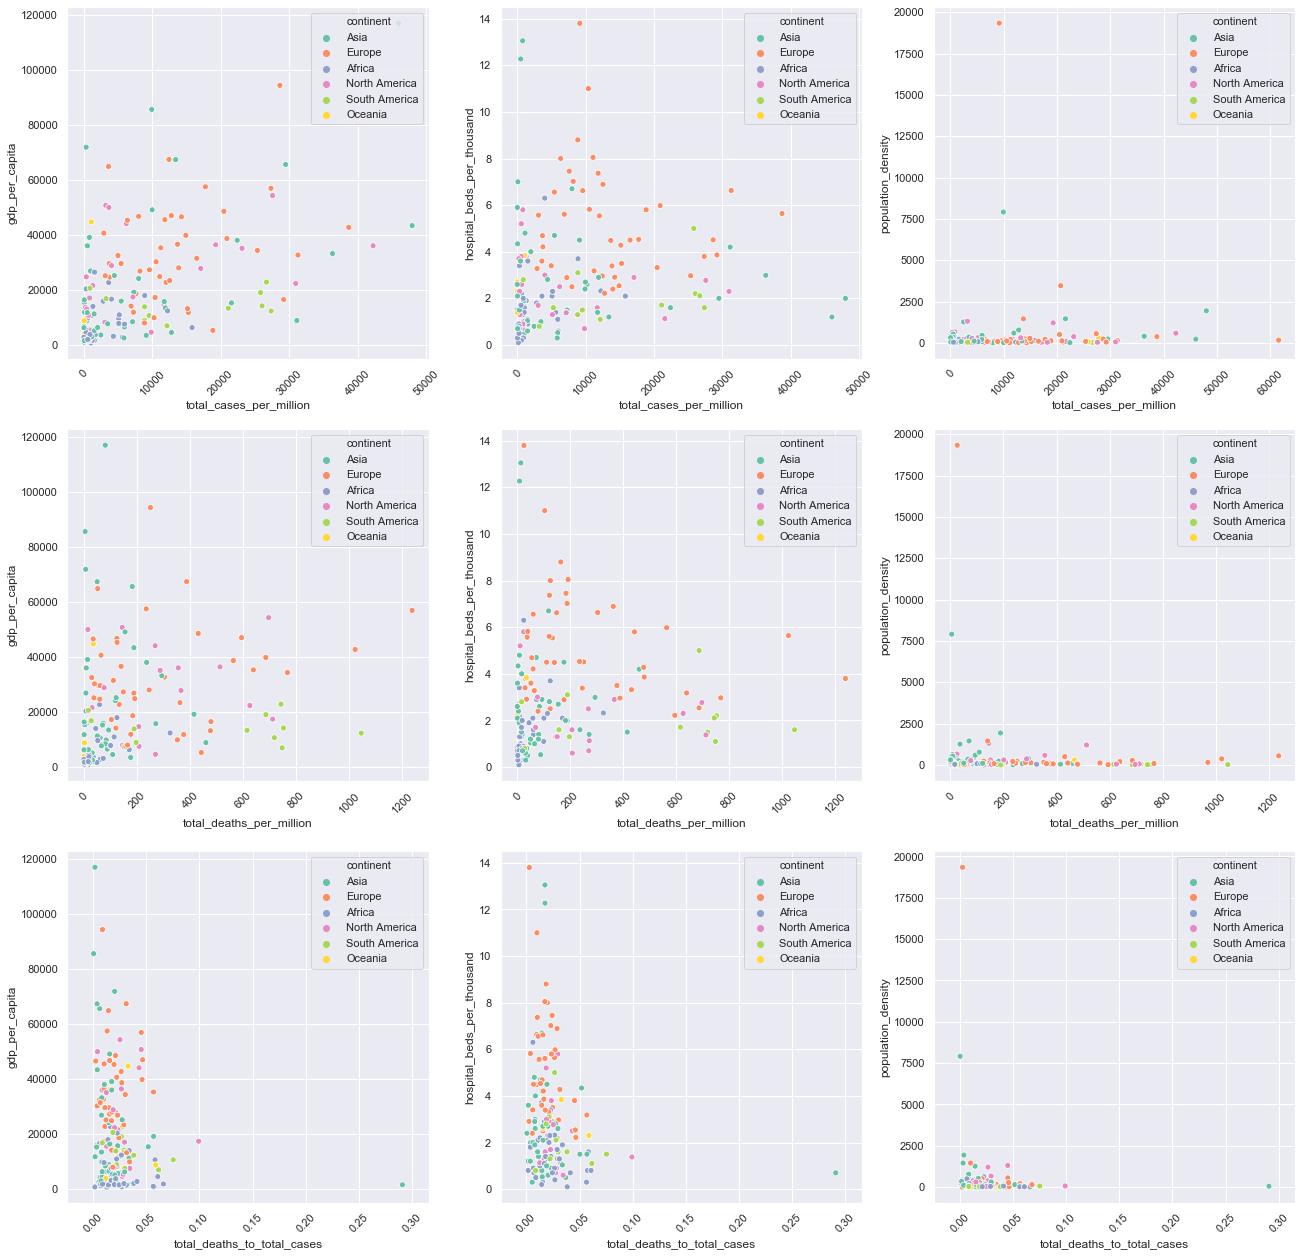

In [175]:
makePlots(22,22,indexes,characteristics,dfA)

###### Heatmap:

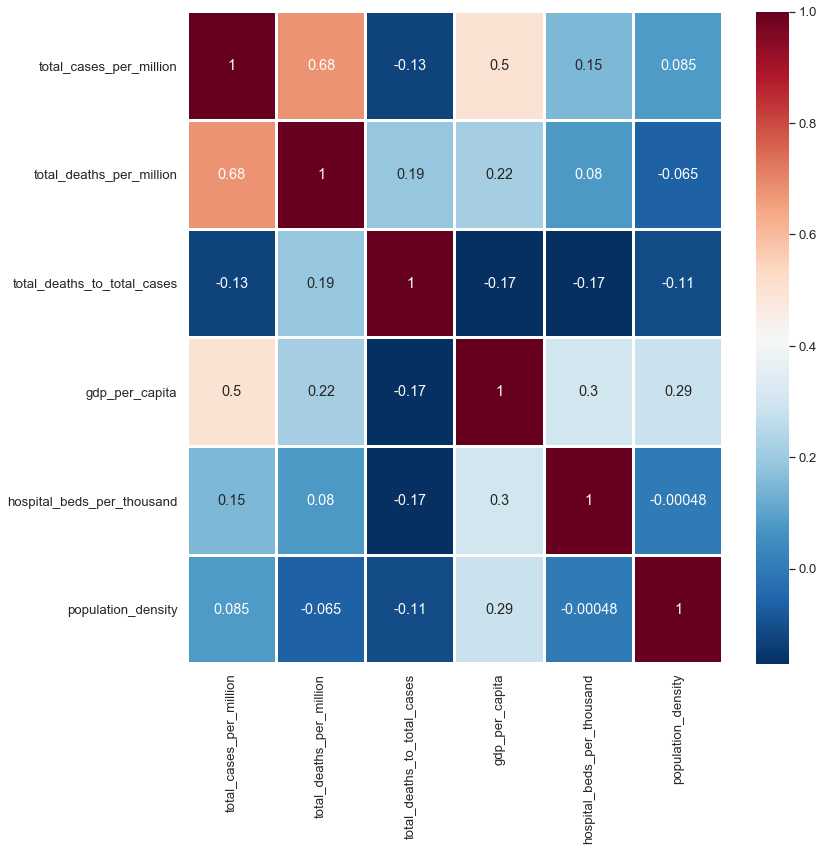

In [176]:

# kept the columns we were interested in
dfA_1 = dfA[indexes + characteristics]

# P-value: Any na (null) values are manually excluded.
dropNA(dfA_1)
# Pearson Coefficient of Correlation: Any na (null) values are automatically excluded.
makeCcHeatMap(12,12,dfA_1)




###### P-value.
Confidence in a relationship is formally determined not just by the correlation coefficient but also by the number of pairs in your data. If there are very few pairs then the coefficient needs to be very close to 1 or –1 for it to be deemed ‘statistically significant’, but if there are many pairs then a coefficient closer to 0 can still be considered ‘highly significant’.

The standard method that statisticians use to measure the ‘significance’ of their empirical analyses is the p-value. . The p-value is a number between 0 and 1 representing the probability that this data would have arisen if the null hypothesis were true. 

A low p-value (such as 0.05) is called statistically significant. 

    COR: Correlation coefficient
    PVAL: p-value
    SS: statistically significant

In [177]:
df_p = findPValue(indexes,characteristics,dfA_1)
df_p

,sets_of_data_1,sets_of_data_2,correlation_coefficient,p_value,statistically_significant
0,total_cases_per_million,gdp_per_capita,0.50,0.00,YES
1,total_cases_per_million,hospital_beds_per_thousand,0.15,0.06,NO
2,total_cases_per_million,population_density,0.08,0.31,NO
3,total_deaths_per_million,gdp_per_capita,0.22,0.01,YES
4,total_deaths_per_million,hospital_beds_per_thousand,0.08,0.33,NO
5,total_deaths_per_million,population_density,-0.06,0.44,NO
6,total_deaths_to_total_cases,gdp_per_capita,-0.17,0.04,YES
7,total_deaths_to_total_cases,hospital_beds_per_thousand,-0.17,0.04,YES
8,total_deaths_to_total_cases,population_density,-0.11,0.18,NO


##### General discussion of the results:
1. GDP PER CAPITA
As it turned out from the above results , the correlation coefficient of the characteristic gdp_per_capita with every index is highly significant because their p-value is extremely low. Per capita gross domestic product (GDP) is a metric that breaks down a country's economic output per person and is calculated by dividing the GDP of a country by its population. That metric shows us that the living standards between nations is a main factor in our research. Mostly in the case of total_cases_per_million where we observe a p-value $\approx$ 0. The  correlation_coefficient in those cases indicates that the better the economy the welthiest the people, so we have more traveling and moving. In addition we have bigger companies that employ more people who interact  so as a results we have bigger spread and more loses. 


2. HOSPITAL BEDS PER THOUSAND
In this case we can easily observe that we have only one statistically significant p-value, which concerns the total_deaths_to_total_cases index. This can be explaned due to the fact with less beds available occurs that those who were infected(cases), have a greater probability to die, because they may be unable to get treated. This conclusion has been made by the negative correlation_coefficient value that occured. On the other hand for index total_deaths_per_million we cannot extract any information about the total_deaths_per_million due to the fact that their p-value is too high. Lastly for index total_cases_per_million some notes can be made but without being so reliable ,because of the p-value = 0.6. That's because the people who are just infected and not in a serious condition do not necessarily need hospital treatment.


3. POPULATION DENSITY
In the case of population density none of the indexes have even a near chance of being statistically significant due to the high values of p-value. In conclusion the is no correlation between the population density and the above indexes. 





##### Discussion of the population density results: 

As mentioned above there cannot be a reliable conclusion regarding any correlation that includes population_density.
As for the plots we are unable to extract any valuable information either. Especially for total_cases_per_million & total_deaths_per_million there are countries within a wide spectrum of values in terms of deaths and cases but they have very similar density. As for the total_deaths_to_total_cases for both axes all values are accumulated in a close range.

#### Repeating the process but with log(population_density) instead
We will now repeat the process using a new column log_population_density in order to compare the new results with the previous ones. There are not many differences in the code. Instead the code is simpler as it only contains one characteristic (log_population_density).
Log scaling computes the log of your values to compress a wide range to a narrow range.

###### Scatter Plots:

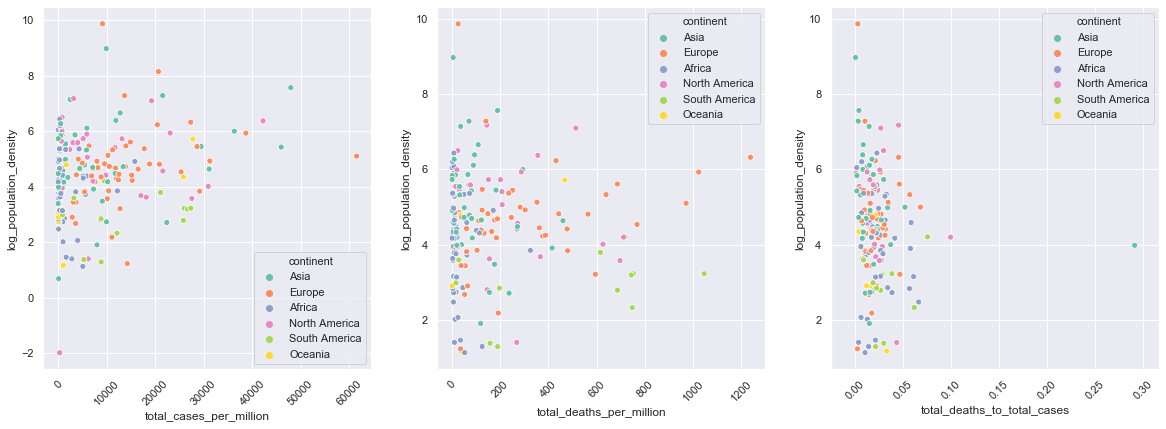

In [178]:
# We add the new column which is the log of the population_density column
dfA['log_population_density'] = np.log(dfA['population_density'])

makePlots(20,6.666,indexes,['log_population_density'],dfA)

###### Heat Map for Correlation coefficient between the indexes and the characteristics.

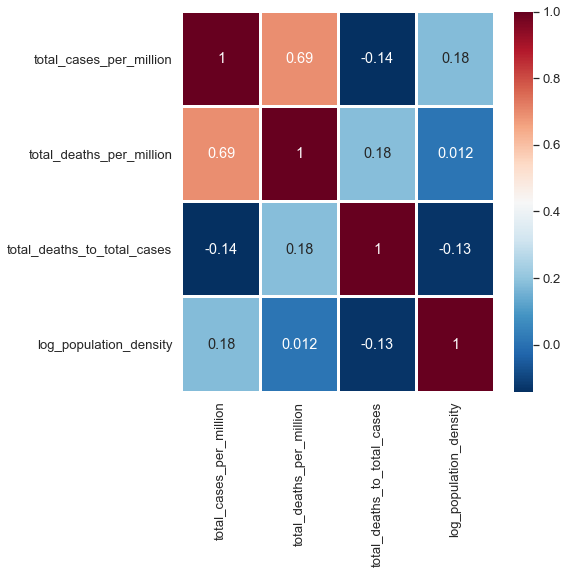

In [179]:
# kept the columns we were interested in
dfA_2 = dfA[indexes + ['log_population_density']]
# P-value: Any na (null) values are manually excluded.
dropNA(dfA_2)
makeCcHeatMap(7,7,dfA_2)

###### P-value:
    COR: Correlation coefficient
    PVAL: p-value
    SS: statistically significant

In [180]:
df_p = findPValue(indexes,['log_population_density'],dfA_2)
df_p

,sets_of_data_1,sets_of_data_2,correlation_coefficient,p_value,statistically_significant
0,total_cases_per_million,log_population_density,0.18,0.01,YES
1,total_deaths_per_million,log_population_density,0.01,0.88,NO
2,total_deaths_to_total_cases,log_population_density,-0.13,0.08,NO


#### Discussion of the log of the population density results: 

In the new results in is clear that Log scaling changes the distribution of the plots, helping to improve linear model performance. The pair total_cases_per_million and log_population_density now has a p-value of 0.01 which makes it 
statistically_significant. Now there is a correlation_coefficient we can rely on. As it seems now the cases pew million are kinda related to the population density somehow. This may seem logical as more people are 'nearest' to one another it's more likely to spread the virus. Ofcourse many other parameters occur to make this correlation not that powerful. Finally the two other indexes seem to have no relation to the population density (Especially total_deaths_per_million which has a very high p-value).

### AFRICA 
By studying the plots carefully we can observe that the african countries have way less cases per million , deaths per million and even a total deaths to total cases analogy, in comparison to the rest of the world. As for the characteristics the amount of beds for example seems decent to the mentioned indexes. Their gdp_per_capita is low making the points of the graph consolidate near the origin of the axes. Lastly we are not going to discuss over the population_density, but we are going to use the log_population_density instead. From this metric we can assume that regardless the density of the african country, the cases,deaths and analogy is really low. Conceptually the continent of Africa seems to affect the results, making them look more optimistic. We are going to prove this assumption by removing Africa from the map. Haha joke. #BlackLivesMatter

In [181]:
# Filtering Data for Question A & B: keeping only 2020-11-01

dfA_not_Africa = dfA.loc[(dfA['continent'] != 'Africa')]

# Reseting the indexes in the data 
dfA_not_Africa.reset_index(drop=True, inplace=True)



###### Scatter Plots without Africa:

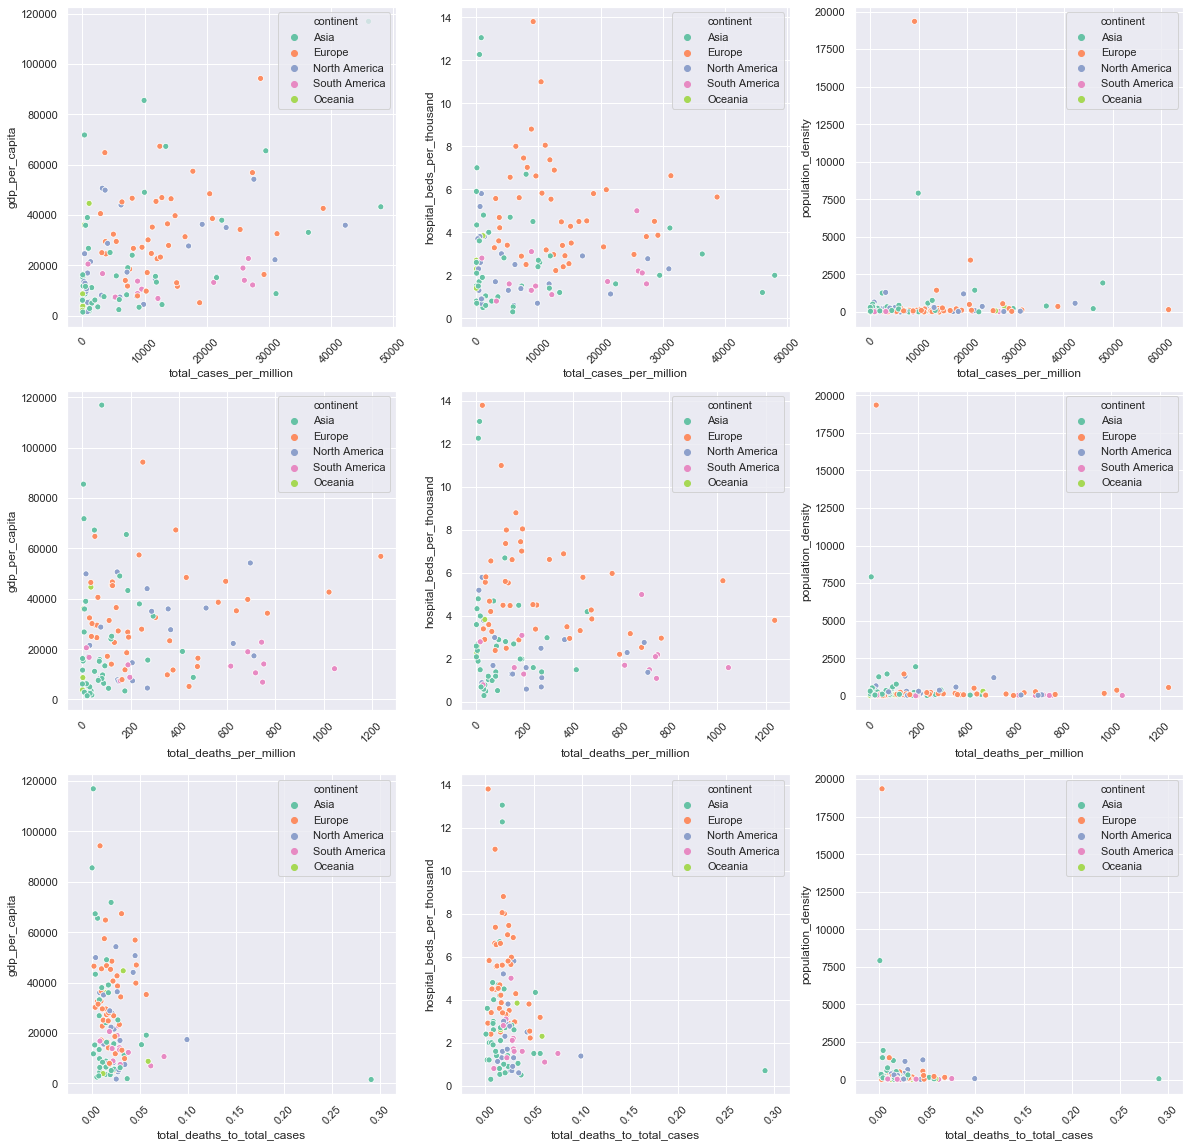

In [182]:
makePlots(20,20,indexes,characteristics,dfA_not_Africa)

###### Heatmap without Africa:

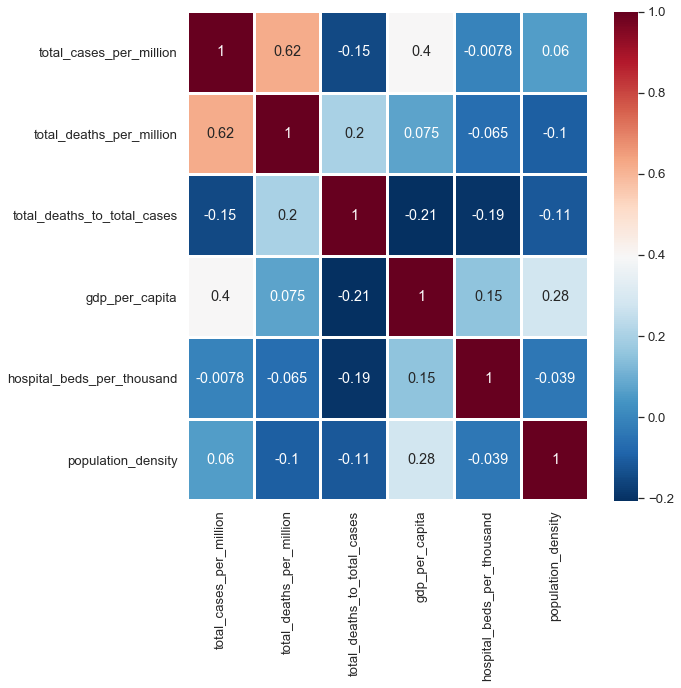

In [183]:
# kept the columns we were interested in
dfA_not_Africa_1 = dfA_not_Africa[indexes + characteristics]

# P-value: Any na (null) values are manually excluded.
dropNA(dfA_not_Africa_1)
# Pearson Coefficient of Correlation: Any na (null) values are automatically excluded.
makeCcHeatMap(9,9,dfA_not_Africa_1)

###### P-Value:

In [184]:
df_p = findPValue(indexes,characteristics,dfA_not_Africa_1)
df_p

,sets_of_data_1,sets_of_data_2,correlation_coefficient,p_value,statistically_significant
0,total_cases_per_million,gdp_per_capita,0.40,0.00,YES
1,total_cases_per_million,hospital_beds_per_thousand,-0.01,0.94,NO
2,total_cases_per_million,population_density,0.06,0.53,NO
3,total_deaths_per_million,gdp_per_capita,0.07,0.44,NO
4,total_deaths_per_million,hospital_beds_per_thousand,-0.07,0.50,NO
5,total_deaths_per_million,population_density,-0.10,0.30,NO
6,total_deaths_to_total_cases,gdp_per_capita,-0.21,0.03,YES
7,total_deaths_to_total_cases,hospital_beds_per_thousand,-0.19,0.04,YES
8,total_deaths_to_total_cases,population_density,-0.11,0.23,NO


#### Repeating the process but with log(population_density) instead


###### Scatter Plots without Africa and log(populations density):

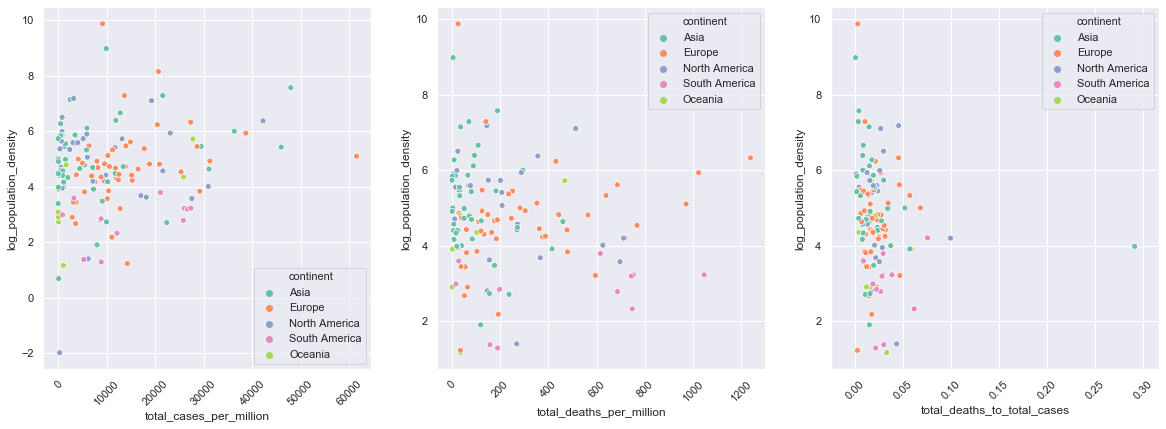

In [185]:
makePlots(20,6.666,indexes,['log_population_density'],dfA_not_Africa)

###### Heatmap without Africa and log(populations density):

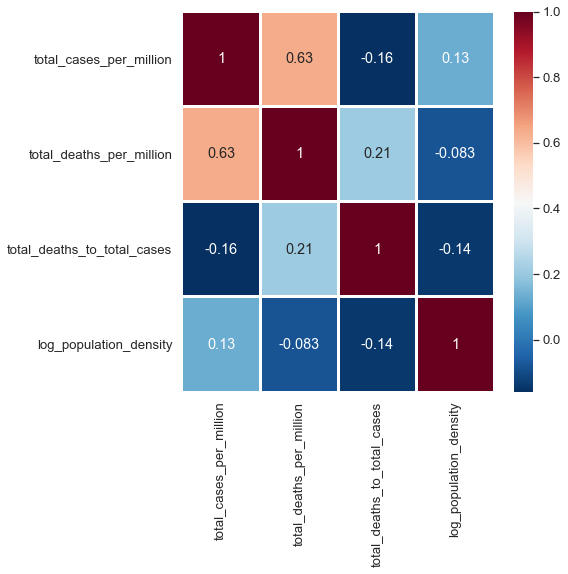

In [186]:
# kept the columns we were interested in
dfA_not_Africa_2 = dfA_not_Africa[indexes + ['log_population_density']]
# P-value: Any na (null) values are manually excluded.
dropNA(dfA_not_Africa_2)
makeCcHeatMap(7,7,dfA_not_Africa_2)

###### P-value without Africa and log(populations density):

In [187]:
df_p = findPValue(indexes,['log_population_density'],dfA_not_Africa_2)
df_p

,sets_of_data_1,sets_of_data_2,correlation_coefficient,p_value,statistically_significant
0,total_cases_per_million,log_population_density,0.13,0.13,NO
1,total_deaths_per_million,log_population_density,-0.08,0.34,NO
2,total_deaths_to_total_cases,log_population_density,-0.14,0.10,NO


### Discussion about the absence of Africa in the data: 

After we removed the data for the continent of Africa, at first glance we can notice a dilution in the plots. Especially near the axes's origin. Later on we observed the impact to the numbers in the heatmap as well. One of our previous highly significance result considering the index: total_deaths_per_million and the characteristic: gdp_per_capita is no more. This change made the correlation not that reliable. One reason for this to happen may be that we lost a number of data. Asuuming that because of the data related to the continent of Africa we had enought similarities for the p-value to stay statistically significant. Finally about the measure we made about the log_population_density characteristic we can that the change kinda "balanced" the p-value near 0.1 to 0.2 . As a result even after the log normalization the population density is unable to provide any reliable info.

### EUROPE 
At this point we will focus our research to a way smaller chunk of data, the continent of Europe.
We will follow the same process in order to subtract information and then we will discuss the results.

In [188]:
# Filtering Data for Question A & B: keeping only 2020-11-01

dfA_Europe = dfA.loc[(dfA['continent'] == 'Europe')]

# Reseting the indexes in the data 
dfA_Europe.reset_index(drop=True, inplace=True)


###### Europe's scatter plots:

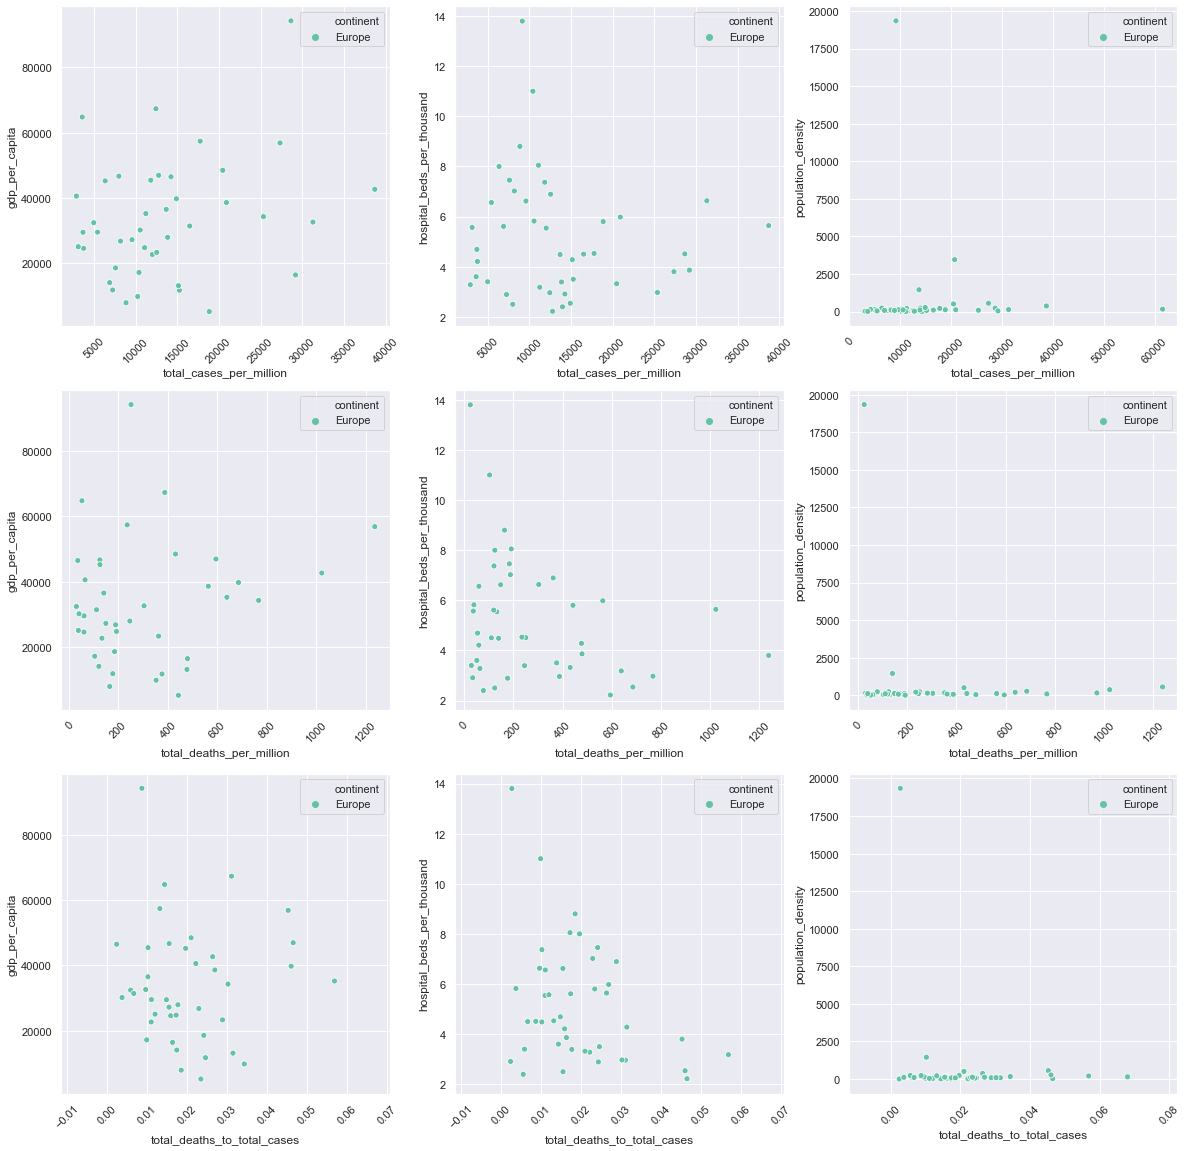

In [189]:
makePlots(20,20,indexes,characteristics,dfA_Europe)

###### Europe's heatmap:

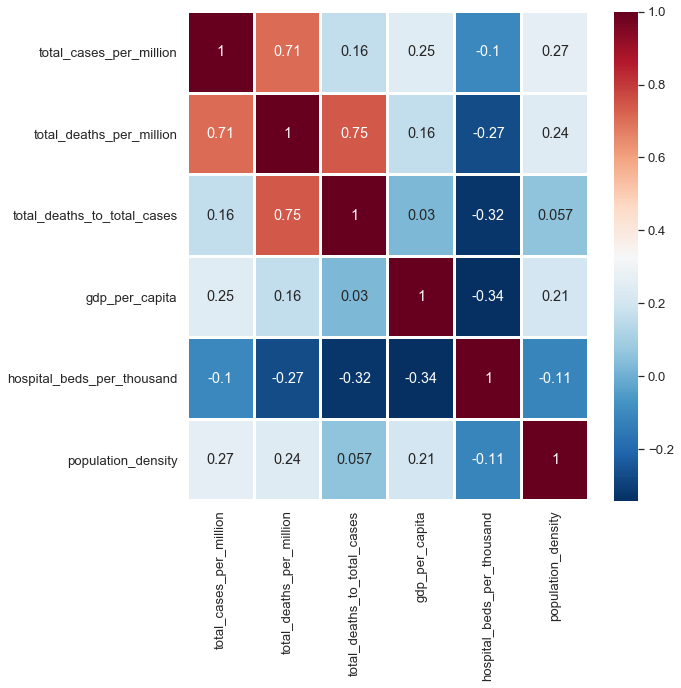

In [190]:
# kept the columns we were interested in
dfA_Europe_1 = dfA_Europe[indexes + characteristics]

# P-value: Any na (null) values are manually excluded.
dropNA(dfA_Europe_1)
# Pearson Coefficient of Correlation: Any na (null) values are automatically excluded.
makeCcHeatMap(9,9,dfA_Europe_1)

###### Europe's p-value:

In [191]:
df_p = findPValue(indexes,characteristics,dfA_Europe_1)
df_p

,sets_of_data_1,sets_of_data_2,correlation_coefficient,p_value,statistically_significant
0,total_cases_per_million,gdp_per_capita,0.25,0.12,NO
1,total_cases_per_million,hospital_beds_per_thousand,-0.10,0.52,NO
2,total_cases_per_million,population_density,0.27,0.09,NO
3,total_deaths_per_million,gdp_per_capita,0.16,0.31,NO
4,total_deaths_per_million,hospital_beds_per_thousand,-0.27,0.09,NO
5,total_deaths_per_million,population_density,0.24,0.13,NO
6,total_deaths_to_total_cases,gdp_per_capita,0.03,0.85,NO
7,total_deaths_to_total_cases,hospital_beds_per_thousand,-0.32,0.04,YES
8,total_deaths_to_total_cases,population_density,0.06,0.73,NO


#### Repeating the process but with log(population_density) instead

###### Europe's scatter plots and log(population_density):

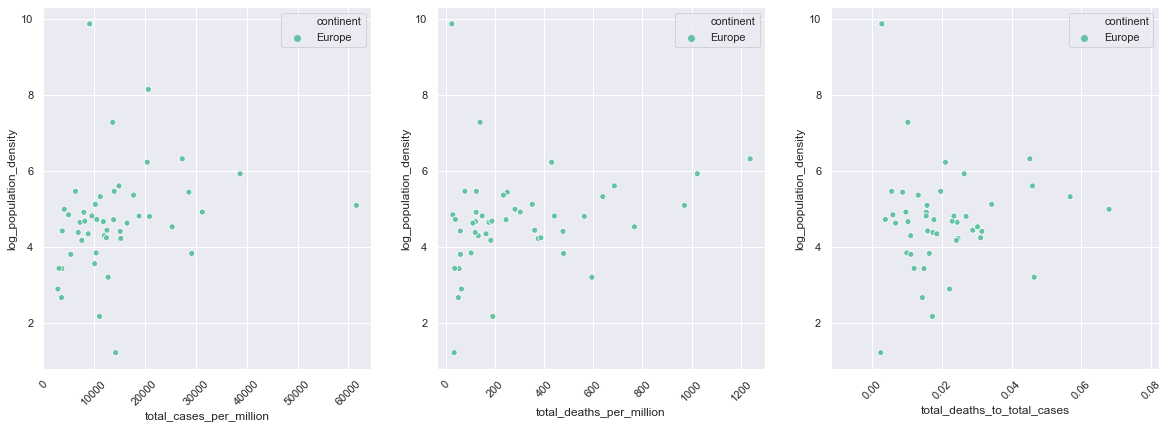

In [192]:
makePlots(20,6.666,indexes,['log_population_density'],dfA_Europe)

###### Europe's heatmap and log(population_density):

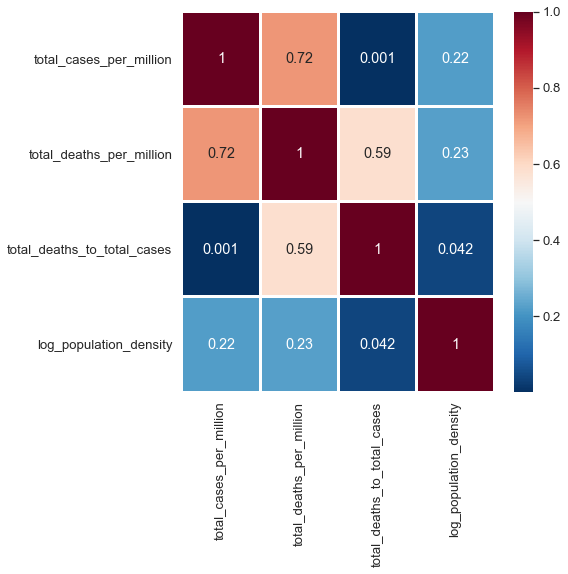

In [193]:
# kept the columns we were interested in
dfA_Europe_2 = dfA_Europe[indexes + ['log_population_density']]
# P-value: Any na (null) values are manually excluded.
dropNA(dfA_Europe_2)
makeCcHeatMap(7,7,dfA_Europe_2)

###### Europe's p-value and log(population_density):

In [194]:
df_p = findPValue(indexes,['log_population_density'],dfA_Europe_2)
df_p

,sets_of_data_1,sets_of_data_2,correlation_coefficient,p_value,statistically_significant
0,total_cases_per_million,log_population_density,0.22,0.14,NO
1,total_deaths_per_million,log_population_density,0.23,0.13,NO
2,total_deaths_to_total_cases,log_population_density,0.04,0.78,NO


### Discussion the data considering only Europe:

About Europe we can observe many things in the plots. First of all the total_cases_per_million index 
in combination  with gdp_per_capita or hospital_beds_per_thousand seems to vary for the different values of the mentioned characteristics. In addition to the correlation Coefficient we got verify this assumption as their p-value Isn’t statistically_significan. In general the difference in cases between the European countries is obvious. Also the similarity in the graphs which include total_deaths_per_million and total_cases_per_million is remarkable. As for the  total_deaths_to_total_cases index correlated to hospital_beds_per_thousand takes the form of a 
Normal distribution ,  with most of the data clustered in the middle. Finally we are going to discuss the statistically significant case ( total_deaths_per_million - hospital_beds_per_thousand) we can observe that countries with a great number of hospital_beds_per_thousand seem to have way less total_deaths_per_million , but as the hospital_beds_per_thousand are decreasing , the number of countries with many total_deaths_per_million are  inscreasing. In some cases we face some way high values. In conclusion European countrie's conditions vary from countries with worrying numbers and others with quite well ones.

## B) 
At this point we are going to group the data by continent and analyze the information we get seperately. We are also going to compare their overall condition with indexes like before.

#### Barplots for each continent: 

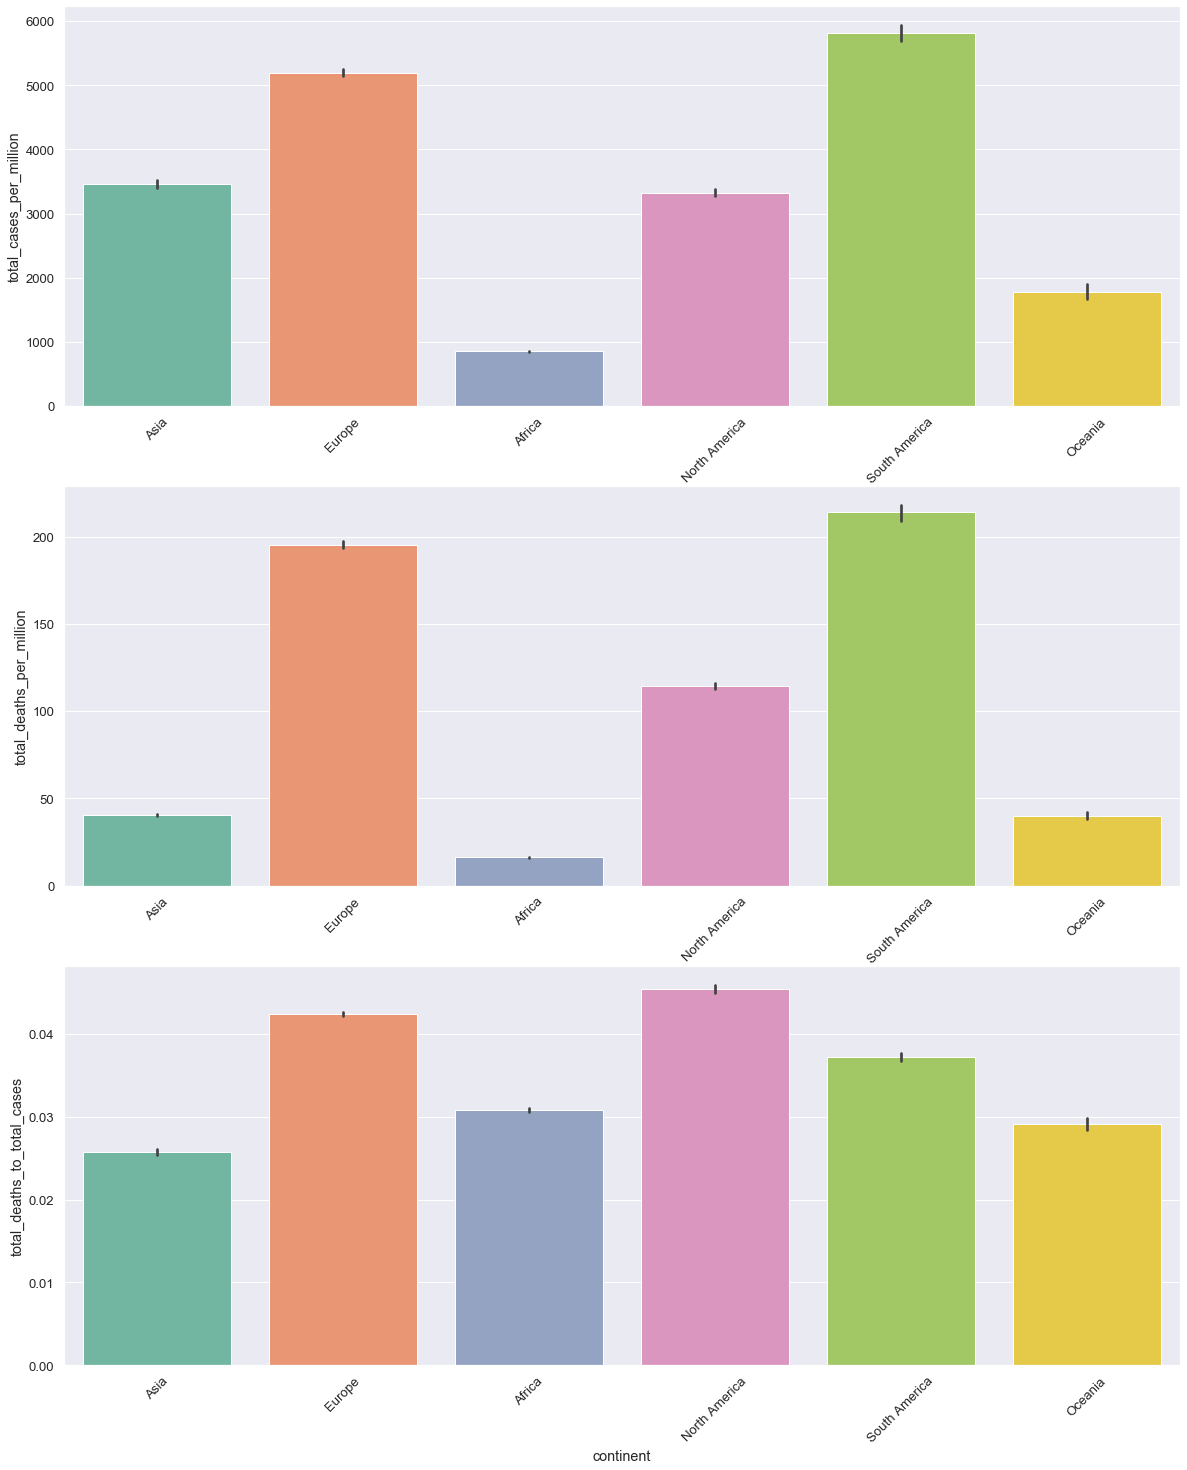

In [195]:
df_B = df[['continent','total_cases_per_million','total_deaths_per_million','total_deaths_to_total_cases']].groupby('continent').mean().reset_index()
makeBarPlot(20,25,indexes,'continent',df)


In [196]:
def t_test(grouped_data, groups_name_str_list, my_indexes):
    middle_index = len(groups_name_str_list)//2
    for index in my_indexes:
        print('\n'+index+':' +'\n'+ '_______________________________________________________')
        for i in range (len(groups_name_str_list)):
            for group2_str in groups_name_str_list[i+1:]:      
                group1 = grouped_data.get_group(groups_name_str_list[i]).index
                group2 = grouped_data.get_group(group2_str).index
                print(groups_name_str_list[i]+'/'+group2_str+'=')
                statistic , p_value = stats.ttest_ind(group1,group2,equal_var = False,nan_policy='omit')
                print("Ttest_indResult(",round(statistic,3),",", round(p_value,3),")")
                print("\n")

### T-Tests:
Τhe t score is a ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable.


In [197]:
# Test statistical significance of the difference in the mean numbers
df_B_group = df[['continent','total_cases_per_million','total_deaths_per_million','total_deaths_to_total_cases']].groupby('continent')

groups_continents_str_list = ['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America']
t_test(df_B_group, groups_continents_str_list , indexes)



total_cases_per_million:
_______________________________________________________
Africa/Asia=
Ttest_indResult( -12.291 , 0.0 )


Africa/Europe=
Ttest_indResult( 4.485 , 0.0 )


Africa/Oceania=
Ttest_indResult( 6.546 , 0.0 )


Africa/North America=
Ttest_indResult( 22.556 , 0.0 )


Africa/South America=
Ttest_indResult( 12.004 , 0.0 )


Asia/Europe=
Ttest_indResult( 17.614 , 0.0 )


Asia/Oceania=
Ttest_indResult( 14.165 , 0.0 )


Asia/North America=
Ttest_indResult( 33.272 , 0.0 )


Asia/South America=
Ttest_indResult( 19.03 , 0.0 )


Europe/Oceania=
Ttest_indResult( 4.047 , 0.0 )


Europe/North America=
Ttest_indResult( 19.868 , 0.0 )


Europe/South America=
Ttest_indResult( 9.811 , 0.0 )


Oceania/North America=
Ttest_indResult( 8.92 , 0.0 )


Oceania/South America=
Ttest_indResult( 4.831 , 0.0 )


North America/South America=
Ttest_indResult( -2.608 , 0.009 )



total_deaths_per_million:
_______________________________________________________
Africa/Asia=
Ttest_indResult( -12.291 , 

### Bar-plots Discussion and T-Tests:

We will first study the Plots concerning total_cases_per_million.
It is easy to see that South America is the continent with the largest number of total_cases_per_million, followed by Europe with a relatively small difference, then Asia and North America ( with a small difference between them), then Oceania with a significant difference and finally Africa with very few total_cases_per_million. It is worth mentioning that the difference between the first and the last is quite large as South America, which has the most total_cases_per_million, has almost 6000 total_cases_per_million, while Africa only about 1000, ie 6 times less total_cases_per_million.

The plots about total_deaths_per_million are similar. But even though the ranking remains the same, there is a big drop in the chart of Asia and Oceania compared to the previous plot. This warns us to conclude that the ratio of total_deaths_to_total_cases of Asia and Oceania will be lower than that of the other continents.

Indeed the plot with total_deaths_to_total_cases comes to confirm our claim and present a different scenario. North America is the continent with the largest proportion. While it is noteworthy that Europe occupies the 2nd place in all 3 plots. South America, which in the previous 2 plots came 1st, comes 3rd, Africa 4th, Oceania 5th and Asia 6th with a small difference.

Helpful remarks:

The chart of Europe remains quite high in all 3 plots and this is something that should be a concern.
The largest percentage of total_deaths_to_total_cases is in North America and is about 5%. The percentage is quite small and that is very encouraging.
Although in the first 2 plots there are very big differences from continent to continent, in the 3rd plot these differences are much smaller. The total_deaths_to_total_cases rate ranges from 2.5% to 5%. Accordingly, we can conclude that although the spread of the virus varies from continent to continent, its mortality rate appears to remain stable at low levels.


The t-test value is:
$$ t = \frac {\overline{x_1} + \overline{x_2}}{\sqrt{\frac{σ_1 ^2}{n_1}+\frac{σ_2 ^2}{n_2}}}$$
where $ \overline{x_i} $ is the mean value of the i dataset, $ σ^2 $ is the variance, and n is the size.

Due to this description we can assume that every correlation between the continents is valid.
As for their statistics, they indicate how many times different they are. 

The p_value was described already. And as it seems every difference is statistically significant.

## C)


### Datetime Grouping & Datetime-Continent Grouping
In this section we are going to group the data with each row containing only one day of the yeat 2020
And in another dataframe we are going to group the data by continent and by day, so every continent will contain the whole year (6 times larger than the Datetime Grouping).

In [198]:
import datetime 

#df['datetime'] = datetime.datetime.strptime(df['date'], '%Y-%m-%d')

# creating a nea column with datatime objects
df['datetime'] = pd.to_datetime(df['date'])

#keeping a starting time at 01/01/2020
start_date = datetime.datetime(2020,1,1)

#greater than the start date 
mask = (df['datetime'] >= start_date)

# applying teh mask
df_C = df.loc[mask]

# adding a new column new_deaths_to_new_cases as asked
df_C['new_deaths_to_new_cases'] = df_C['new_deaths']/df_C['new_cases']

# avoiding the 'infinite' cases :) 
df_C = df_C.replace([np.inf, -np.inf], 0)
# and fill all the na in the new_deaths_to_new_cases column with 0s
df_C['new_deaths_to_new_cases'] = df_C['new_deaths_to_new_cases'].fillna(0)

# Create new columns
df_C['month'] = df_C['datetime'].dt.month_name()
# fill all na with 0s after the div
df_C['new_deaths_to_new_cases'] = df_C['new_deaths_to_new_cases'].fillna(0)

# group-by and sum 
df_C_gb_datetime = df_C[['continent','datetime','new_cases','new_deaths','new_deaths_to_new_cases']].groupby(['datetime'])




### Sum of all the indexes for each day:
Calculated the sum of the indexes for each date seperately(Combined the information of every continent).

In [199]:

df_C_gb_datetime = df_C_gb_datetime.sum().reset_index()
df_C_gb_datetime['new_deaths_to_new_cases'] = df_C_gb_datetime['new_deaths']/df_C_gb_datetime['new_cases']
df_C_gb_datetime = df_C_gb_datetime.fillna(0)
df_C_gb_datetime

,datetime,new_cases,new_deaths,new_deaths_to_new_cases
0,2020-01-01,0.0,0.0,0.000000
1,2020-01-02,0.0,0.0,0.000000
2,2020-01-03,34.0,0.0,0.000000
3,2020-01-04,0.0,0.0,0.000000
4,2020-01-05,30.0,0.0,0.000000
...,...,...,...,...
322,2020-11-18,1161682.0,21410.0,0.018430
323,2020-11-19,1250330.0,22152.0,0.017717
324,2020-11-20,1276212.0,21354.0,0.016732
325,2020-11-21,1356092.0,23750.0,0.017514


### Datetimes grouped by Months 
Now we are going to grouo each date by the specific month in which it belongs. 

### Bar plots for every Month ,Worldwide

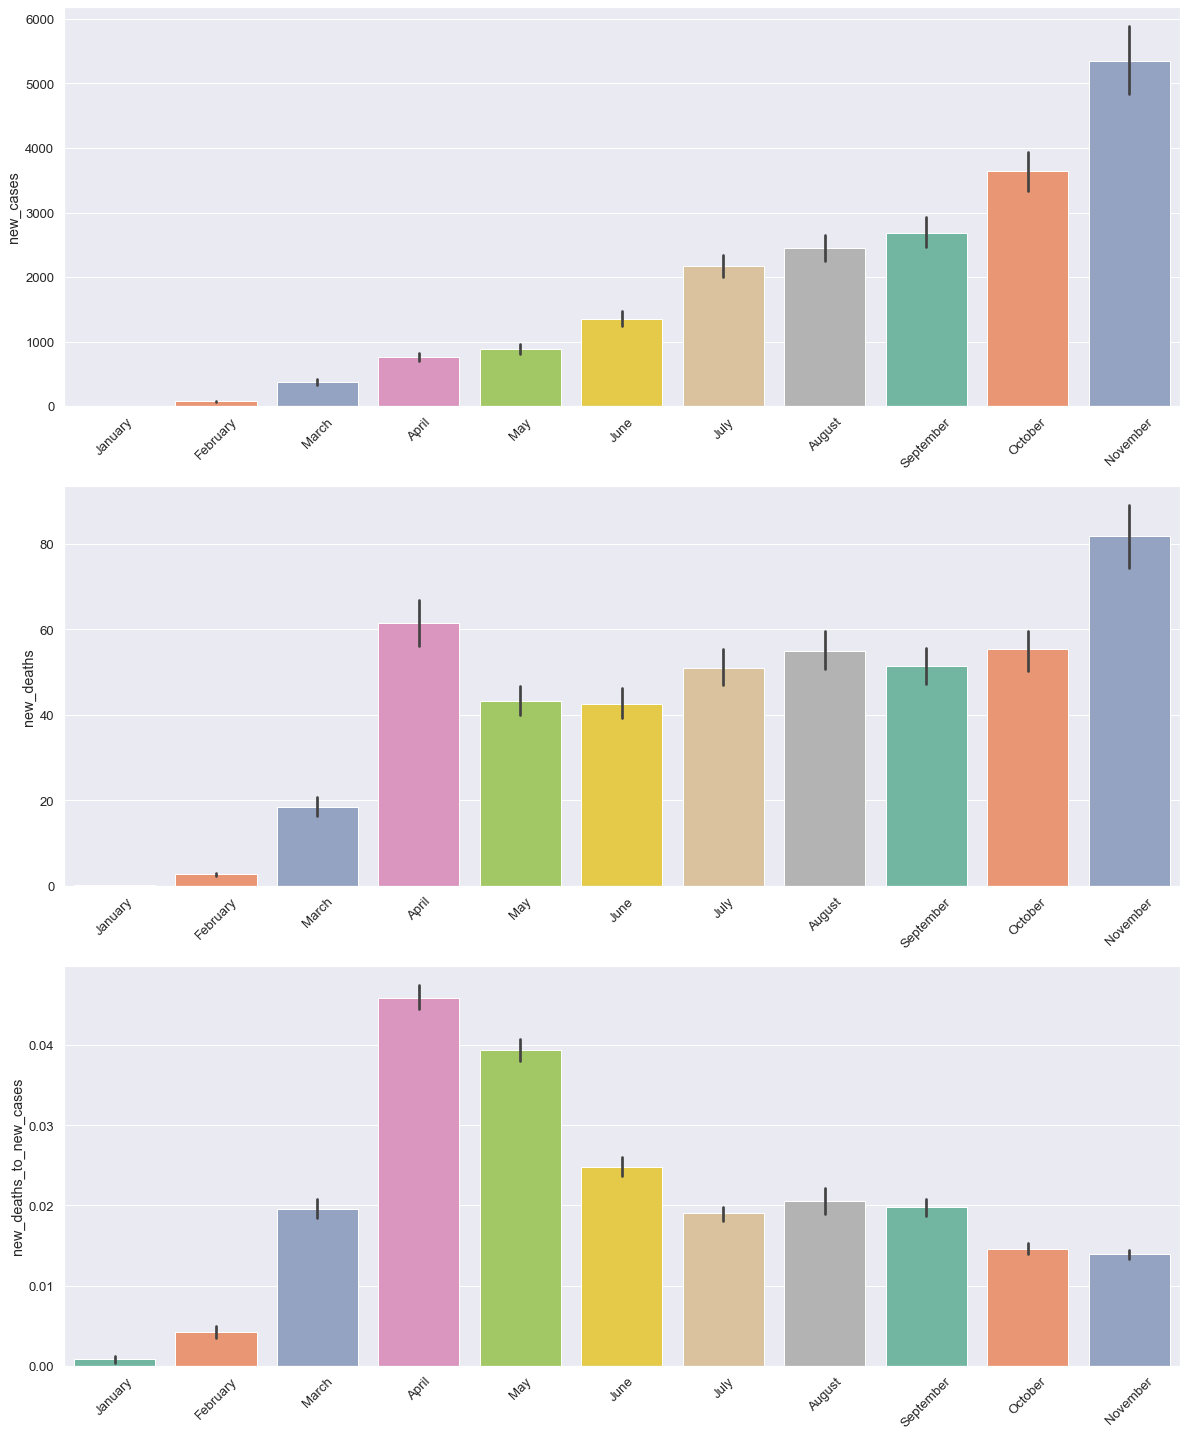

In [200]:
makeBarPlot(20,25,['new_cases','new_deaths','new_deaths_to_new_cases'],df_C['month'].tolist() ,df_C)

### Discussion on the plots:
The above plots show us the average value of the number of new cases, new deaths and their global proportion, for each month from January 1st onwards (until November 22nd).

Let's start with the first plot, which concerns the variation of new cases per month. We note that new cases worldwide have never stopped growing. In fact, the average value of the number of new cases of the month we are going through, since March, when the spread of the virus seems to have started, is overwhelmingly higher. Of course, this is also the reason for the spread of the virus throughout the world. The focal points according to the plot seem to be April and July, but also November, as these are the months in which the largest number of new cases is observed. In a following plot we will study in more detail whether this increase in cases is exponential.

The next plot shows the average value of the number of deaths per month. In this plot significant changes are observed compared to the previous one. An important similarity between the plots is that in this plot, as before, the initial eruption in the number of new deaths occurs in March, which was preceded by the eruption of the number of new cases. However, special emphasis should be given to the month of April, where there is an increase in new deaths of 500%. This logically happens because, as we said before, April was the month that the virus began to spread around the world, so many countries seem to have underestimated the importance of the virus and caught hexapine, resulting in many victims. In contrast to the previous plot, the number of new deaths does not show a continuous increase. After April, the planet seems to have found a way to deal with the rise in deaths, as shown by the plot, there is a fairly large drop in deaths in May and then small fluctuations until October. A fairly large increase in deaths, as it had for the treatment of cases, is observed in November.

Finally, the final Plot that presents the average value of the ratio of new deaths to new cases will give us quite valuable data. It is clear that from January to April, we had a devaluation of the situation as the death rate per case gradually increased from 2% to 8%. The encouraging thing, of course, is that from April onwards this percentage only decreases. The critical turning point for achieving this event seems to be the month of May, as with measures taken internationally, the death rate per case fell from 8 % of April to 5% and from there on follows a downward trend exclusively.

### Are the new_cases growing exponentially?
In the following plot, it is clear the exponential increase of cases over time (from January 1st until today, November 22nd). As in the previous barplot, which we analyzed extensively, we observe strong curves (increase) during the months of April, July and November.

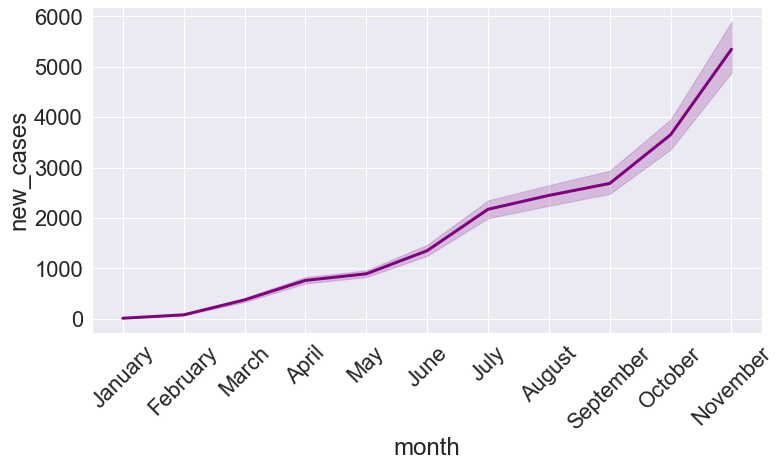

In [201]:
makeLinePlot(12,6,['new_cases'],'month',df_C)


### Continent-Month Grouping
Calculated the sum of the indexes for each continent seperately.

In [202]:
# group-by and sum 
df_C_gb_continents_datetime = df_C[['continent','datetime','new_cases','new_deaths','new_deaths_to_new_cases']].groupby(['continent','datetime'])
df_C_gb_continents_datetime  = df_C_gb_continents_datetime.sum().round()
df_C_gb_continents_datetime['new_deaths_to_new_cases'] = df_C_gb_continents_datetime['new_deaths'] /df_C_gb_continents_datetime['new_cases'] 
df_C_gb_continents_datetime  = df_C_gb_continents_datetime.fillna(0)
df_C_gb_continents_datetime

new_cases  new_deaths  new_deaths_to_new_cases
continent     datetime                                                  
Africa        2020-01-01        0.0         0.0                 0.000000
              2020-01-02        0.0         0.0                 0.000000
              2020-01-03        0.0         0.0                 0.000000
              2020-01-04        0.0         0.0                 0.000000
              2020-01-05        0.0         0.0                 0.000000
...                             ...         ...                      ...
South America 2020-11-18    56394.0      1331.0                 0.023602
              2020-11-19    56706.0      1329.0                 0.023437
              2020-11-20    59433.0      1143.0                 0.019232
              2020-11-21    60977.0      1097.0                 0.017990
              2020-11-22    52901.0       822.0                 0.015538

[1962 rows x 3 columns]

### Catplot for each continent and the months

<Figure size 72x72 with 0 Axes>

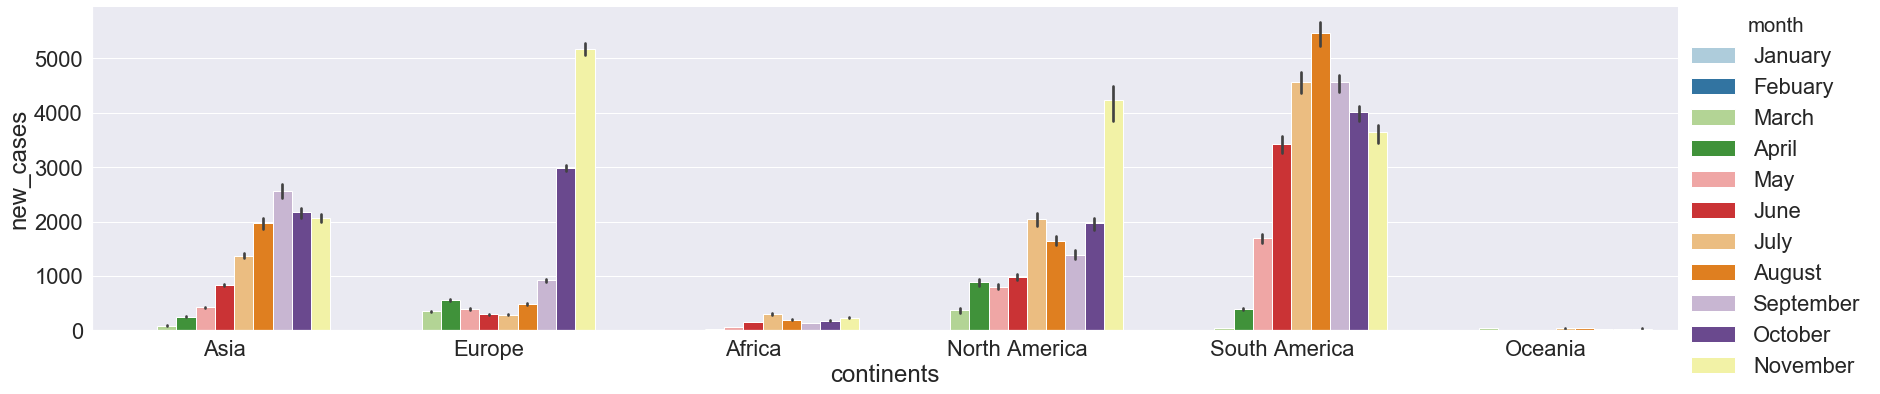

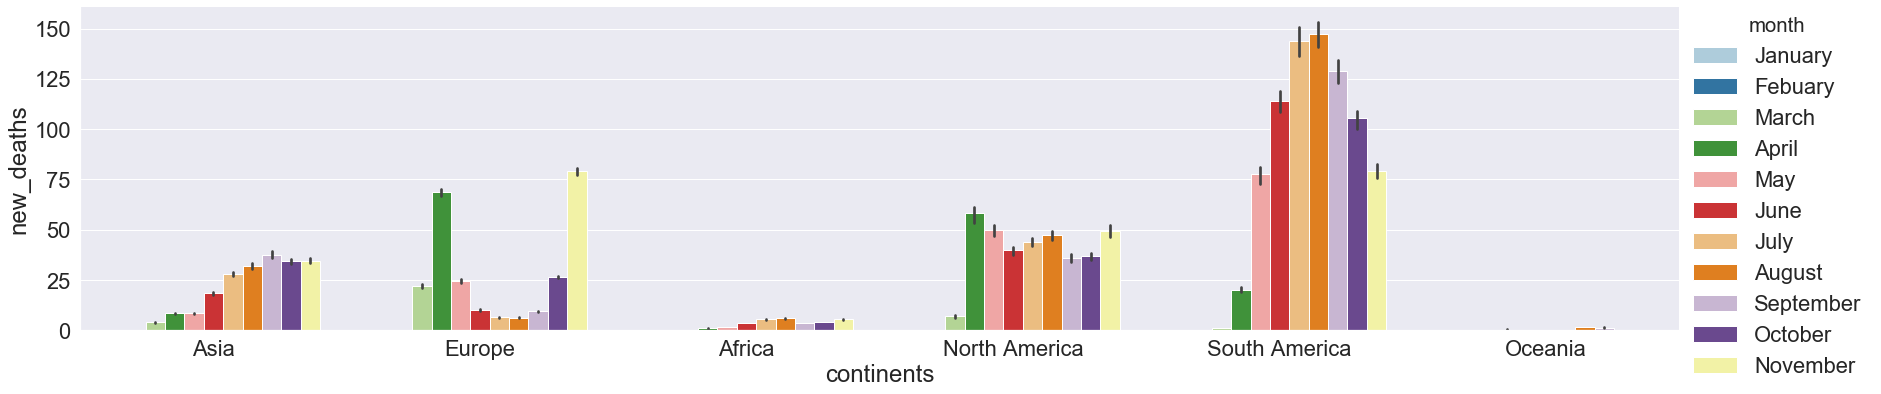

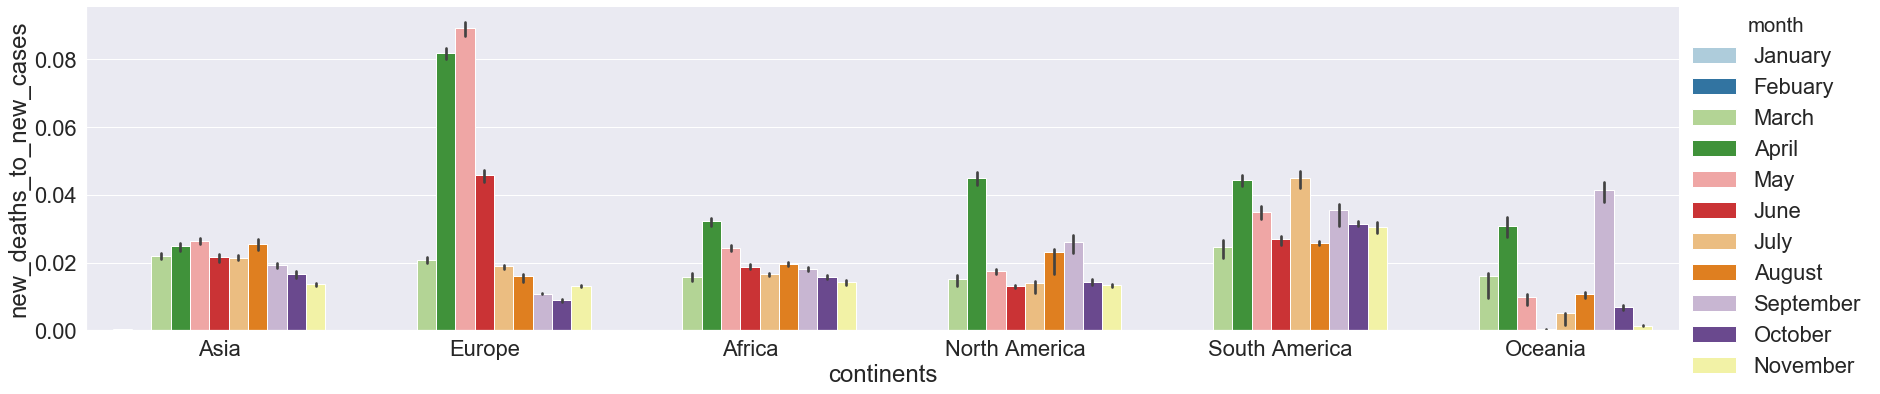

In [203]:
makeGroupedBarPlot(1,1,['new_cases','new_deaths','new_deaths_to_new_cases'],'continent','month', df_C)

### Discussion:
In the above grid are presented as plots the results of the measurements for the averages of the new cases of new deaths, but also their ratio for each month, per continent. This graph is extremely interesting as we can observe and compare how differently each continent dealt with the virus and how long the pandemic affected each continent.


As in any other case, the first Plot will concern the number of cases. We generally observe that for the months of January and February the average value of the number of new cases tends to zero, so a substantial study will be done from March onwards. For March, more new cases seem to appear in North America and Europe and less in Asia, although the pandemic started from there. . In South America we had a greater outbreak of cases during the summer months, which makes perfect sense if one considers that summer is the time when the inhabitants of Latin American countries are active. The situation is similar in Asia, but with much fewer cases. Europe and North America have a smoother situation during the summer months which starts to go away from October onwards. This is likely to happen as the climate begins to cool in these areas over time and there is more congestion indoors. Africa and Oceania have fairly small numbers of cases, with no particular fluctuations throughout the pandemic.


The next plot concerns the average value of new deaths for each continent. In this case, as in the previous substantive discussion, it can be done from March onwards, as prices for January and February tend to zero. In this case, too, there are very strong differences between the continents, with South America having the highest values in this chart as in the previous one. These values even create a curve, which reaches its peak in the summer months and then begins to recede. In Asia there is a gradual small increase in the number of deaths throughout without showing sharp differences from month to month. In Europe, on the other hand, we find a completely different scenario with rapid increases in deaths in April and November and very low prices in the rest of the months, especially in the summer. leading to a small reduction in the number of new deaths. Africa and Oceania, as before, have zero death rates without significant fluctuations. From deaths and alone it is difficult to draw useful conclusions about this and the next plot is more important.

This Plot shows the proportion of deaths and cases per continent, for each month. This plot shows us that Africa and Asia have fairly stable values for the proportion of deaths to cases without particular fluctuations throughout the period we are examining. Of course, it is worth noting that these results for the specific continents were questioned by many. The situation is similar in South America. The situation is completely different in Europe, where in April and May, when the virus began to infect the continent, the highest rates were recorded worldwide, of 8% and 9% respectively and then rapidly reduced. . In North America there is also a large increase in the percentage in April and a rapid decrease after. Finally in Oceania, which in the previous two categories had values that tended to zero, now shows significant death rates to cases and especially in September, which shows a percentage of 4%.

## D) 
At this point we will look at whether and how much the outcome of the United States election played a role in the evolution of the pandemic. More specifically, we will examine whether there was a statistically interesting difference in the degree of outbreak of the pandemic depending on what the people in each state voted for.





In [204]:
# Opening the file about covid
df_us_cov = pd.read_csv('united_states_covid19.csv', skiprows=3,index_col=0)
# Opening the file about the elections
df_us_elect = pd.read_excel('state-voting.xlsx',index_col=0)

# Merging the results about New York and New York city 
df_us_cov.loc["New York"] = df_us_cov.loc["New York"].fillna(0)
df_us_cov.loc["New York"] = df_us_cov.loc["New York"]  + df_us_cov.loc["New York City"] 

df_us_cov.reset_index(inplace=True)

# renaming the column in order to make the merge of the dataframes
df_us_cov.rename(columns={"State/Territory":"State"}, inplace=True)

df_us_cov = df_us_cov.set_index('State')

# merging
df_D = pd.merge(df_us_cov,df_us_elect,on='State')
df_D['Deaths to Cases'] = round(df_D['Total Deaths']/df_D['Total Cases'],2)
df_D_results = df_D[['Case Rate per 100000','Death Rate per 100000','Deaths to Cases','Abbreviation','Vote']]
d = {'R': 0, 'D': 1}
df_D_results

,Case Rate per 100000,Death Rate per 100000,Deaths to Cases,Abbreviation,Vote
State,,,,,
Alaska,3752.0,15.0,0.00,AK,R
Alabama,4846.0,71.0,0.01,AL,R
Arkansas,4921.0,79.0,0.02,AR,R
Arizona,4279.0,90.0,0.02,AZ,D
California,2846.0,47.0,0.02,CA,D
Colorado,3625.0,50.0,0.01,CO,D
Connecticut,3003.0,136.0,0.05,CT,D
District of Columbia,2905.0,95.0,0.03,DC,D
Delaware,3377.0,78.0,0.02,DE,D


To achieve the above, from the available data we have, we will study only those concerning cases per 100,000 inhabitants, deaths per 100,000 inhabitants and mortality rate. In other words, we will reject the numbers of cases and deaths in the last 7 days (from November 27), as the elections took place earlier. We will also not study the total cases per state, which consist, as we have observed, of the confirmed cases cumulatively with the probable cases, as we could not draw safe conclusions, since the population varies greatly from state to state. For example, the largest state in the United States (California) has a population of 39,937,500, while the smallest (Wyoming) has only 567,030. For the same reason we will not use the total deaths. We calculate the mortality rate and use it in our research, as we believe that the number of deaths is usually proportional to the number of cases, so a percentage of the total number of deaths to the total number of cases will help us find useful conclusions.

In [205]:
# map the votes in order to make a p-value later. 
df_D_results['Vote'] = df_D_results['Vote'].map(d)

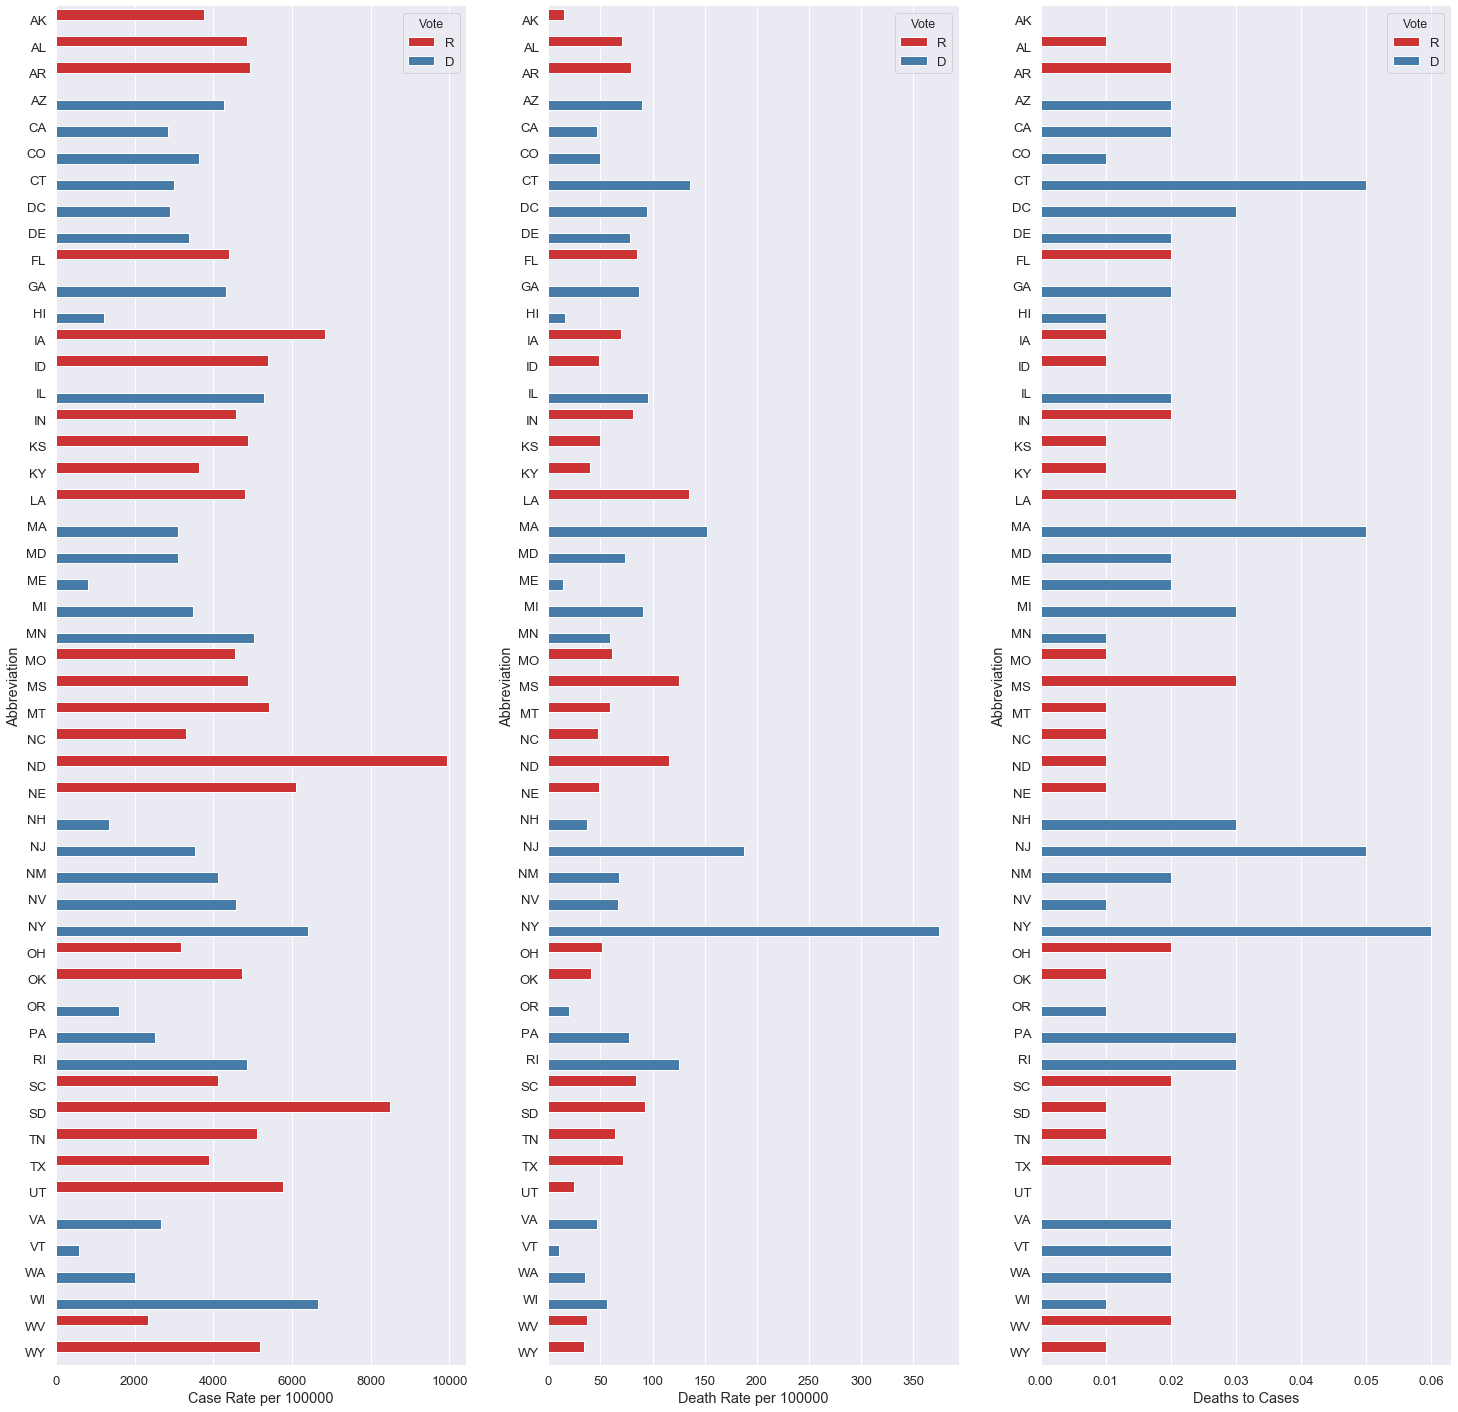

In [206]:
makehueBarPlot(25,45,['Case Rate per 100000','Death Rate per 100000','Deaths to Cases'],df_D)

In [207]:
findPValue(['Case Rate per 100000','Death Rate per 100000','Deaths to Cases'],['Vote'],df_D_results)

,sets_of_data_1,sets_of_data_2,correlation_coefficient,p_value,statistically_significant
0,Case Rate per 100000,Vote,-0.47,0.00,YES
1,Death Rate per 100000,Vote,0.17,0.24,NO
2,Deaths to Cases,Vote,0.45,0.00,YES


Initially studying the Plot of cases per 100,000 inhabitants, we find that the states in which the outbreak of the pandemic was greatest, (most cases per 100,000 inhabitants were diagnosed) voted for the Republican Party. A typical example is the case of the State of North Dakota where we encounter the highest number of cases per 100,000 inhabitants and we have a predominance of Republicans. On the contrary, we have a clear predominance of the Democratic Party in the States, which have a relatively small number of cases, a typical example in this case are the States of Vermont, Maine and Hawaii, which showed the lowest incidence rates among all the States.
The above observation is confirmed by the algorithm we used, which showed us that the correlation between the outbreak of the pandemic and the election result is statistically significant (p-value = 0 <0.05). This particular algorithm also showed us that in 53% of the States with the highest incidence of cases preferred the Republican party.

The situation is quite different in the case of deaths per 100,000 inhabitants. Examining the plot we can trace quite a large coincidence between the number of deaths and the election result. Characteristic of this case is the fact that the State with the most deaths per 100,000 inhabitants (New York), but also those with the lowest (State of Maine and State of Vermont) chose the same election result, since in both cases we had victory of the Democratic party. Also in States with the same number of deaths per 100,000 inhabitants, we observe changes in the election result. So we find that it is not possible to extract safe results for the correlation of deaths per 100,000 inhabitants and election result. This is confirmed by the results of the algorithm, which shows that the randomness rate is very high of 24% (p-value = 0.24).

Finally, in the case of the mortality rate, ie deaths per case, we find considerable interest. In this plot the situation appears opposite to that of the first plot, the correlation of the pandemic cases with the election results, as it is observed, the States that seem to have a high mortality rate showed their preference in the Democratic party. A typical example is that all four states with the highest mortality rates, namely the states of New York, New Jersey, Connecticut and Massachusetts, all elected the Democratic Party. Respectively, the States with the lowest death rate per case (Alaska and Utah) elected the Republican party. These results are verified once again by our algorithm, which showed that the correlation between mortality rate and election result is statistically significant (and in this case p-value = 0 <0.05). In fact, it seems that our hypothesis that the high mortality rate led to the election of the Democrats is verified at a rate of 45%.

The election profile of the United States of America seems to be linked to the outbreak of pandemics. We observe that the States that elected the Republican party are facing a greater outbreak of cases. This result may be due to the fact that the people of these states, as supporters of the Republican Party, followed the initial attitude of the then government and the President of the USA, who underestimated the virus, resulting in a greater outbreak of the pandemic in these areas. Democrats, meanwhile, have taken a more conservative stance on the virus and the government's rhetoric, resulting in a lower prevalence of cases in Democratic-elected states. Also, on the other hand, we can assume that the States with a high mortality rate condemned the government's stance on the pandemic and elected the rival party.

## 5) (Bonus) 
## Question: Had the interest for the vaccine increased during to the pandemic and what factors influenced it the most?

At this point in the project we will try to analyze a topical issue. We searched Google Trends for the search frequency of the word vaccine, which is arguably one of the hottest topics of the day. The question we asked is whether the global search for the word vaccine has increased due to the pandemic and what factors influenced it the most? (cases, deaths, mortality rate).

Our initial claim is that the frequency of searches increased rapidly during the pandemic. In fact, we believe that the search reached its peak this month, as it was officially announced that there was production of effective vaccines, for which marketing approval was requested. To confirm or disprove our claim we will study the search frequency of the word "vaccine" from last year (2019) until today. Finally, we will study the correlation between the increase in cases, deaths and mortality rates with the frequency of searching for the word vaccine for each month of the year we are going through (2020) until today. To help we will create plots that will graphically present the results for the above queries and we will examine if there are statistically significant results for the correlations.

Below we present a graph that shows us the variation of the search frequency for the word vaccine from January 1, 2019 until today. It is easy to notice that the search frequency remained low, with small fluctuations, from the beginning of 2019 until February and March 2020, the time of the spread of the pandemic throughout the world, after which we had rapid increase in search. This may be due to the fact that a wave of fear has spread worldwide and people were looking for a solution to this problem. This interest then seemed to wane as the first wave of the pandemic was overcome and with it the initial fear. We have a sharp increase in the search for the word vaccine in the summer months as that was the period when information began to be published regarding the creation and marketing of an effective vaccine. The initial information, although it showed that the creation of a vaccine against coronavirus is on track, did not contain final answers, such as the effectiveness of the vaccine and its release date, with the result that the public interest gradually decreased until November. In November, the searches are more than ever as it was officially announced that there was an effective vaccine that will be released immediately worldwide. In addition, many governments have announced that they have ordered vaccines to be made available to the public. So such a rapid search for the word vaccine seems perfectly normal.

In [208]:
# Opening the file about covid
df_vaccine2 = pd.read_csv('multiTimeline2.csv', skiprows=2)
# creating a nea column with datatime objects
df_vaccine2['datetime'] = pd.to_datetime(df_vaccine2['Week'])
df_vaccine2 = df_vaccine2[['datetime','vaccine: (Worldwide)']]
# Create new columns
df_vaccine2 = df_vaccine2.replace('<1', 0)
df_vaccine2['vaccine: (Worldwide)'] = pd.to_numeric(df_vaccine2['vaccine: (Worldwide)'])



#### Line plot: 

X-axis: date

Y-axis: Google searches about vaccination in general. 

Source: Google trends

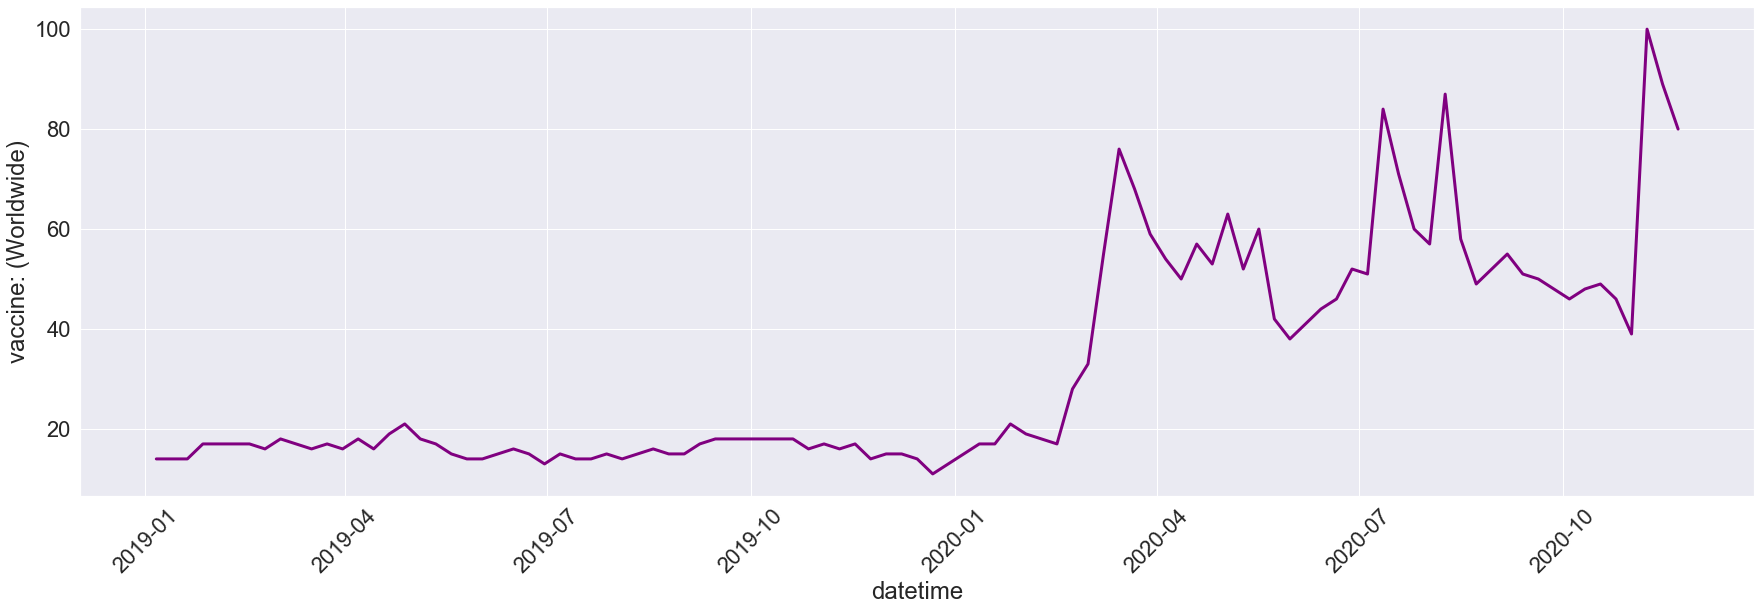

In [209]:
makeLinePlot(30,9,['vaccine: (Worldwide)'],'datetime',df_vaccine2)

Having seen the clear differences in the search frequency for the word vaccine (increase of the order of 400% - 500%) below we will examine in more detail whether this increase is associated with an increase in deaths and mortality rates worldwide. To examine these cases we created the following plots. In these plots on the vertical axis we have the search frequency of the word vaccine and on the horizontal axis one of the characteristics mentioned above for each of the three plots. Each dot concerns a specific month of the year, from the beginning until today and each month is represented by a different color.

In [210]:
# Opening the file about covid
df_vaccine = pd.read_csv('multiTimeline.csv', skiprows=2)
# creating a nea column with datatime objects
df_vaccine['datetime'] = pd.to_datetime(df_vaccine['Week'])
df_vaccine = df_vaccine[['datetime','vaccine: (Worldwide)']]
# Create new columns
df_vaccine = df_vaccine.replace('<1', 0)
df_vaccine['month'] = df_vaccine['datetime'].dt.month_name()
df_vaccine['vaccine: (Worldwide)'] = pd.to_numeric(df_vaccine['vaccine: (Worldwide)'])

df_vaccine = df_vaccine.groupby('month', sort=False).mean()

df_C_month = df_C[['month','new_cases','new_deaths','new_deaths_to_new_cases']].groupby('month', sort=False).sum()
df_C_month['new_deaths_to_new_cases'] = round(df_C_month['new_deaths']/df_C_month['new_cases'],2)





df_5 = pd.merge(df_vaccine,df_C_month,on='month')

df_5.reset_index(inplace=True)
df_5

,month,vaccine: (Worldwide),new_cases,new_deaths,new_deaths_to_new_cases
0,January,17.75,19598.0,426.0,0.02
1,February,20.50,150828.0,5416.0,0.04
2,March,58.80,1446630.0,71528.0,0.05
3,April,54.00,4678422.0,378284.0,0.08
4,May,51.60,5784730.0,280372.0,0.05
5,June,46.50,8498458.0,268184.0,0.03
6,July,67.75,14135880.0,332422.0,0.02
7,August,62.20,15928156.0,357228.0,0.02
8,September,51.50,16911380.0,324342.0,0.02
9,October,48.25,23890992.0,362096.0,0.02


#### Scatter Plot: 
This scatter Plot shows us the amount of Google searches about vaccination for each month (colored points) in terms of new-cases, new-deaths and new_deaths_to_new_cases. 

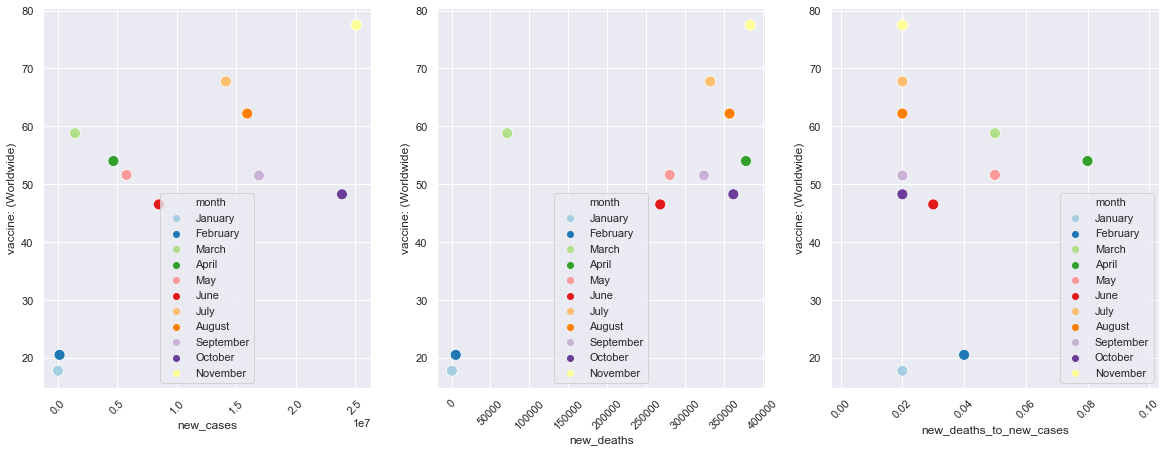

In [211]:
makeScatterPlots(20,7,['new_cases','new_deaths','new_deaths_to_new_cases'],["vaccine: (Worldwide)"],'month',df_5)

#### HeatPlot:

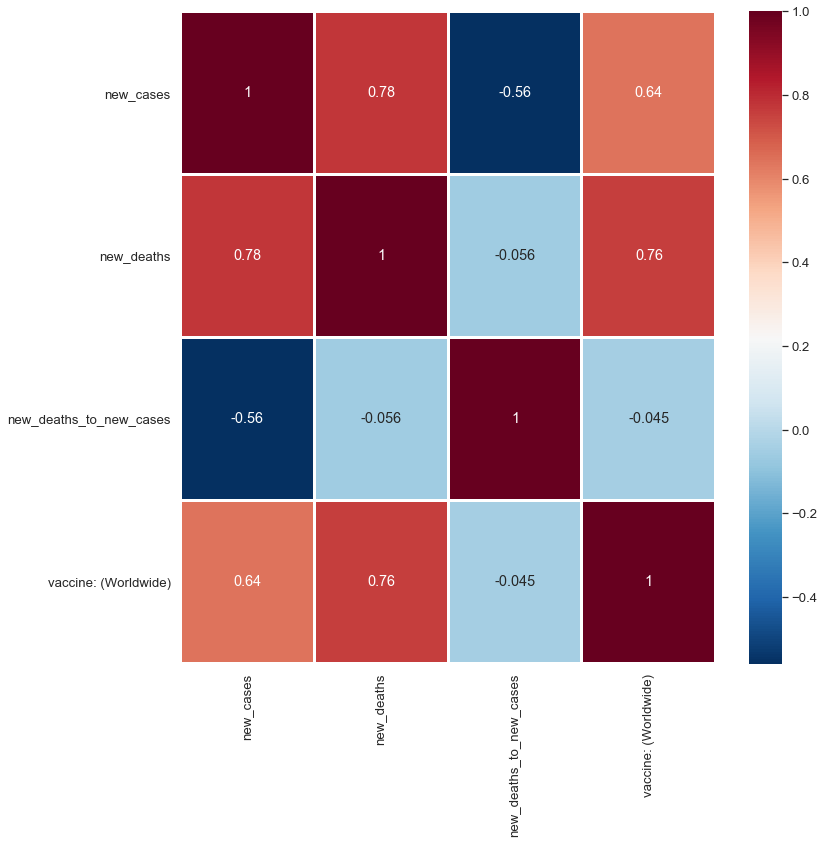

In [212]:
makeCcHeatMap(12,12,df_5[['new_cases','new_deaths','new_deaths_to_new_cases']+['vaccine: (Worldwide)']])

#### P-Value: 

In [213]:
findPValue(['new_cases','new_deaths','new_deaths_to_new_cases'],['vaccine: (Worldwide)'],df_5)

,sets_of_data_1,sets_of_data_2,correlation_coefficient,p_value,statistically_significant
0,new_cases,vaccine: (Worldwide),0.64,0.03,YES
1,new_deaths,vaccine: (Worldwide),0.76,0.01,YES
2,new_deaths_to_new_cases,vaccine: (Worldwide),-0.05,0.90,NO


We will first study the plot regarding the correlation of the search frequency for the word vaccine and the number of new cases for each month. We notice the correlation exists as the first two months of the year where we have the smallest number of new cases worldwide we also have the least interest in searching for the word vaccine. During these months we have a fairly small spread of the virus worldwide and the virus is present mainly in Asian countries. The initial assessment that the virus would not "travel" to the western world did not initially worry its inhabitants, so interest in the word vaccine does not differ from last year's levels of interest. Also a typical example in this claim are July and August, months in which there is both a rapid increase in cases and searches. The results that contradict the above claim are those of March where we have a sharp increase in the search for the word vaccine, but not the cases. Of course we believe that this fact is the exception and not the rule as as we have already mentioned March was the month that the virus spread all over the planet. To confirm the above we have programmatically proved the correlation of new cases per month and the frequency of search for the word vaccine by finding the p-value and the correlation coefficient. From the results (p-value = 0.03 and corr = 0.64) we can see that our claim proved to be correct. We followed the specific programming process for the next plots.

Examining the plot containing the deaths per month and the frequency of searching for the word vaccine we notice a greater correlation between them than in the previous plot. We observe that for a large percentage of cases, as the number of deaths increases, so does the search frequency for the word vaccine. March is an exception once again for reasons we have already mentioned. But the similarity shown in the increments of the 2 features is really impressive. It seems that in this case, as in many others, the fear of death is what surrounds man. A very typical example is July when we have the second highest frequency of search for the word vaccine, as July was the month with the highest outbreak of deaths in Latin America and harsh images projected worldwide, such as those of mass graves in Brazil. The algorithm in this case also confirms us as the p-value is even lower than before (p-value = 0.01) and the correlation coefficient even higher (0.76)

Finally for the last plot there is a huge randomness between the search frequency and the mortality rate that is proven by the resulting algorithmic values ​​(p-value = 0.9). We assume that this is due to a percentage of the media which do not often show the mortality rate, but stand quite high in cases and deaths and as we have seen according to our previous measurements these are the numbers that scare - seduce the world, and lead him to look for the means of solving this problem which in the case of covid is the vaccine.

In conclusion, according to the above results but also with extensive research that we did on the internet, we realized that we can answer positively for the first part of the question we asked, that is, how it is true that the search for the word vaccine has increased worldwide. We can also answer with confidence that the factors that most affected the search frequency for the word vaccine are the increase in deaths and cases. In our personal view the common denominator in both cases is fear. The fear of people for their health and especially the fear for their life lead them to the search for the factor that will solve the problem that causes this fear and consequently to the search for the vaccine that will "defeat" the specific virus.